# Machine Learning: Loan Default Predictor

## **Introduction:**

In this project I will be using a loan data set to make predictions on whether a loan (with certain characteristics) will default.

I will train the following models:

- Logistic Regression: Baseline  model for performance comparison.
- Random Forest: Ensemble method known for its ability to handle complex data structures.
- Gradient Boosting Machine (GBM) OR XGBoost: Advanced ensemble tknown for their predictive ability.
- Neural Network (MLP): A method that uses interconnected nodes that process information and each different node connection has a different weight to resemble its importance to for the model. We will be using a specific class of a NN called MPL that has 3 layers and will find non-linear relationships
- StackingClassifier: A combined model that uses other models and creates one. Additionaly, the model auto tunes for you. Simple and easy way to make a machine learning model.



## Load Libraries:

In [142]:
#!pip uninstall scikit-learn --yes
#!pip install scikit-learn==1.2.2

In [143]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- sklearn modules
from sklearn.model_selection import train_test_split    #- partition train/test split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier        #- multi-layer perceptron
from sklearn.preprocessing import LabelBinarizer


# -- we need these to make our pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# -- we need these to evaluate our models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# -- need this to render charts in notebook --
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# --
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt


## Load Data:

In [240]:
loan = pd.read_csv('https://raw.githubusercontent.com/MikeVej/ML_LoanDefaults/main/Loan%20Data/loan_train.csv')
loan.head()

id     member_id   loan_amnt  funded_amnt  funded_amnt_inv  \
0 1077501.00000 1296599.00000  5000.00000   5000.00000       4975.00000   
1 1077430.00000 1314167.00000  2500.00000   2500.00000       2500.00000   
2 1076863.00000 1277178.00000 10000.00000  10000.00000      10000.00000   
3 1069639.00000 1304742.00000  7000.00000   7000.00000       7000.00000   
4 1072053.00000 1288686.00000  3000.00000   3000.00000       3000.00000   

        term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0  36 months   10.65%    162.87000     B        B2  ...          NaN   
1  60 months   15.27%     59.83000     C        C4  ...          NaN   
2  36 months   13.49%    339.31000     C        C1  ...          NaN   
3  60 months   15.96%    170.08000     C        C5  ...          NaN   
4  36 months   18.64%    109.43000     E        E1  ...          NaN   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0           Sep-2016                    0.00000      1.00000       INDIVIDUAL   
1           Sep-2016                    0.00000      1.00000       INDIVIDUAL   
2           Apr-2016                    0.00000      1.00000       INDIVIDUAL   
3           Sep-2016                    0.00000      1.00000       INDIVIDUAL   
4           Dec-2014                    0.00000      1.00000       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0        0.00000                  0.00000     0.00000              0.00000   
1        0.00000                  0.00000     0.00000              0.00000   
2        0.00000                  0.00000     0.00000              0.00000   
3        0.00000                  0.00000     0.00000              0.00000   
4        0.00000                  0.00000     0.00000              0.00000   

  tax_liens  
0   0.00000  
1   0.00000  
2   0.00000  
3   0.00000  
4   0.00000  

[5 rows x 52 columns]

### Columns in data

In [145]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [146]:
loan.loan_status.value_counts(normalize=True)

loan_status
current   0.84965
default   0.15035
Name: proportion, dtype: float64

In [147]:
loan_status_types = loan['loan_status'].unique()
print(loan_status_types)

['current' 'default']


## Exporatory Analysis

### Zips where default is > 30

In [148]:
# Zip codes where default counts is > 30
zip_df = loan.pivot_table(index='zip_code', columns='loan_status', aggfunc='size', fill_value=0)

df_postal_count = loan.groupby(['zip_code'])['loan_status'].count().to_frame()

postal_list = list(df_postal_count[df_postal_count['loan_status']>=30].index)

###  Graph: Top defaults by zip code

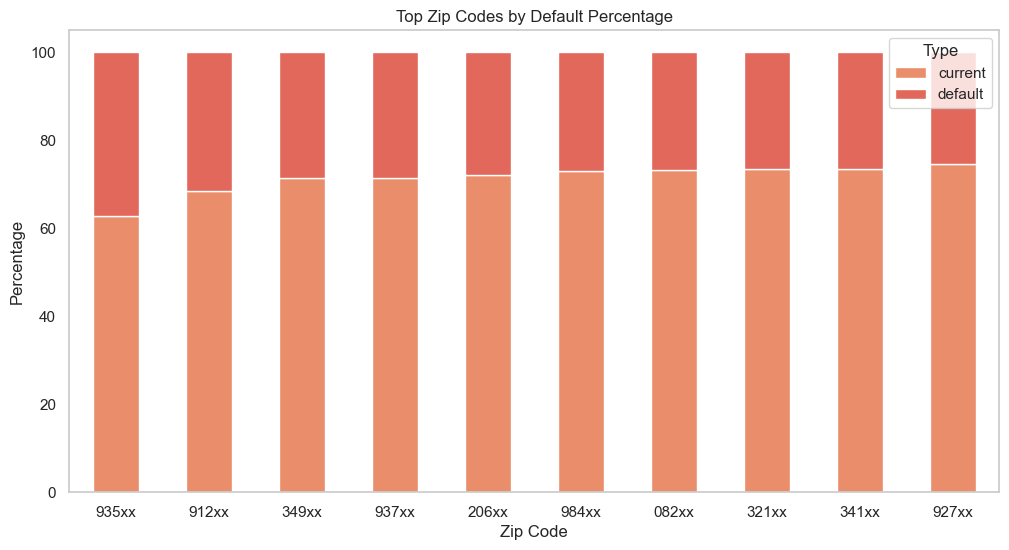

In [149]:
zip_df.reset_index()
# Calculate percentages
pivot_percentage = zip_df[['current', 'default']].div(zip_df[['current', 'default']].sum(axis=1), axis=0) * 100
pivot_percentage = pivot_percentage.sort_values('default',ascending=False)
df_viz = pivot_percentage[pivot_percentage.index.isin(postal_list)]
sns.set_palette("flare")
df_viz.head(10).plot(kind='bar', stacked=True, grid=False, figsize=(12, 6))
plt.title('Top Zip Codes by Default Percentage')
plt.xlabel('Zip Code')
plt.ylabel('Percentage')
plt.legend(title='Type')
plt.xticks(rotation=0)
plt.show()

### Graph: Top Defaults by emplyment length

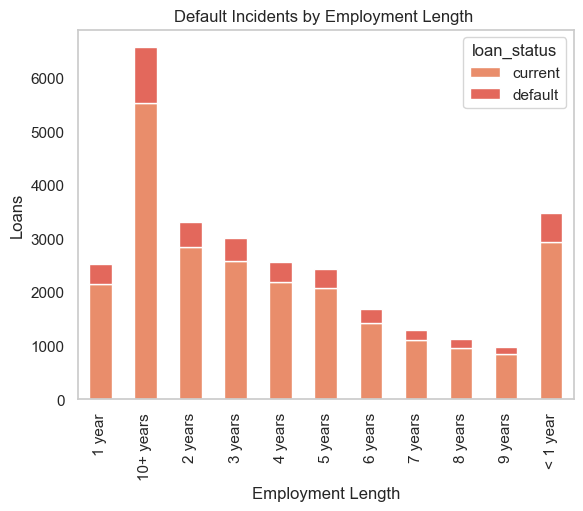

In [150]:
#Plot Fraud Incidents by years working
df_pivot = loan.pivot_table(index='emp_length', columns='loan_status', aggfunc='size', fill_value=0)
df_pivot.plot.bar(stacked=True, grid=False)
plt.xlabel('Employment Length')
plt.ylabel('Loans')
plt.title('Default Incidents by Employment Length ')
plt.show()

### Graph: Top Defaults by employment title

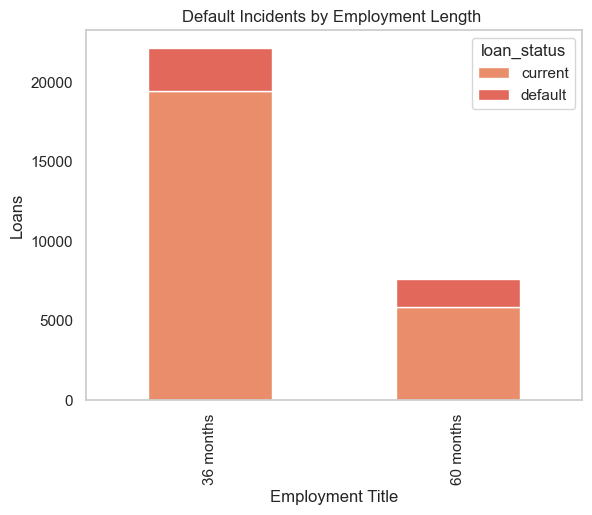

In [151]:
#Plot Fraud Incidents by years working
df_pivot = loan.pivot_table(index='term', columns='loan_status', aggfunc='size', fill_value=0)
df_pivot.plot.bar(stacked=True, grid=False)
plt.xlabel('Employment Title')
plt.ylabel('Loans')
plt.title('Default Incidents by Employment Length ')
plt.show(10)

### Graph: Numeric Variable Distributions

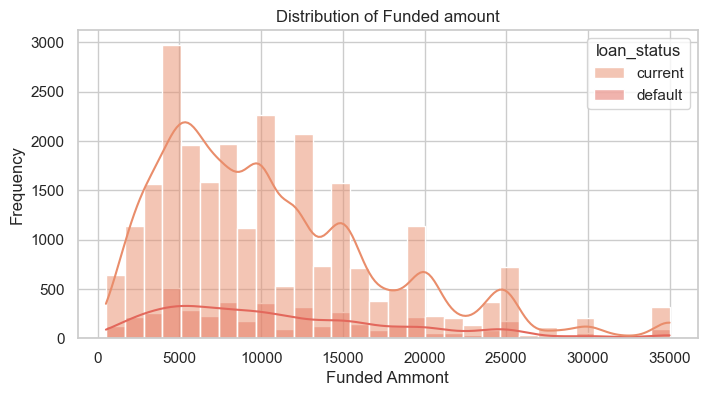

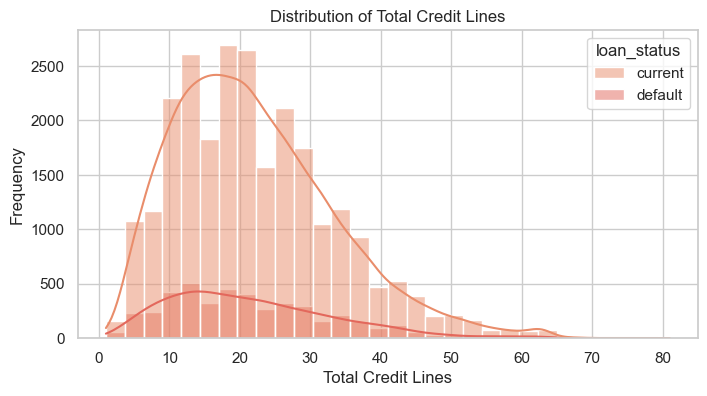

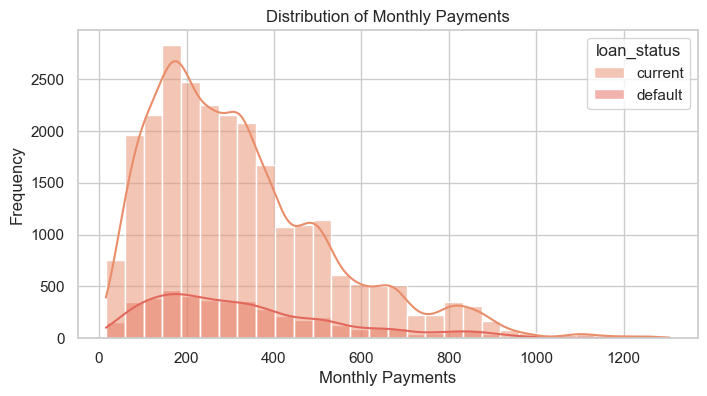

In [152]:
plt.figure(figsize=(8, 4))
sns.histplot(data= loan, x='funded_amnt', hue="loan_status", kde=True, bins=30)
plt.title(f'Distribution of Funded amount')
plt.xlabel('Funded Ammont')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data= loan, x='total_acc', hue="loan_status", kde=True, bins=30)
plt.title(f'Distribution of Total Credit Lines')
plt.xlabel('Total Credit Lines')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data= loan, x='installment', hue="loan_status", kde=True, bins=30)
plt.title(f'Distribution of Monthly Payments')
plt.xlabel('Monthly Payments')
plt.ylabel('Frequency')
plt.show()
    

## Data Prep:

### Identify features (Categorical/Numerical):

#### Describe Data:

##### Use this code to find feature warnings for feature selection (Un-comment to run tuning)

In [153]:
#def df_profile(df, target):

#    df = loan.copy()

#    numeric_features = [ c for c in df.select_dtypes(include = np.number).columns ]
#    pd.options.display.float_format = '{:.5f}'.format

#    categorical_features = [ c for c in df.select_dtypes(include = "object").columns ]

#    rowcnt = len(df)
#    df_s1  = df.agg(['count', 'nunique','mean','min','max']).transpose().reset_index().rename(columns={"index":"feature_name"}).round(4)
#    df_s1['count'] = df_s1['count'].astype('int64')
#    df_s1['nunique'] = df_s1['nunique'].astype('int64')
#    df_s1["null"] = (rowcnt - df_s1["count"]).astype('int64')
#    df_s1["not_null"] = rowcnt - df_s1["null"]
#    df_s1["null_pct"] = df_s1["null"] / rowcnt
#    df_s1["nunique_pct"] = df_s1['nunique'] / rowcnt


#    dt = pd.DataFrame(df.dtypes).reset_index().rename(columns={"index":"feature_name", 0:"dtype"})
#    df_stats = pd.merge(dt, df_s1, on='feature_name', how='inner')

#    df_stats = df_stats.sort_values("dtype").reset_index(drop=True)

#    df_stats['feature_type'] = "UNKNOWN"
#    df_stats.loc[np.logical_or(df_stats['dtype'] == int, df_stats['dtype'] == float), 'feature_type'] = "NUMERIC"
#    df_stats.loc[df_stats['dtype'] == object, 'feature_type'] = "CATEGORY"
#    df_stats.loc[df_stats['feature_name'] == target, 'feature_type'] = "TARGET"

#    df_stats['feature_warning'] = "NO WARNING"
#    df_stats.loc[df_stats['nunique_pct'] > 0.9, 'feature_warning'] = "EXCLUDE, GT 90% UNIQUE"
#    df_stats.loc[df_stats['null_pct'] > 0.2, 'feature_warning'] = "NULL WARNING, GT 20% MISSING"#
#    df_stats.loc[df_stats['null_pct'] > 0.5, 'feature_warning'] = "EXCLUDE, GT 50% MISSING"
#    df_stats.loc[np.logical_and(np.logical_or(df_stats['dtype'] == int, df_stats['dtype'] == float), df_stats['nunique'] <= 20), 'feature_warning'] = "LIKELY CATEGORICAL, NUMERIC w. LOW CARDINALITY"

#    return df_stats

#dfp = df_profile(loan, 'loan_status')

#dfp

#### Unique Values in different columns:

In [220]:
loan_status_types = loan['emp_title'].unique()
print(loan_status_types)


[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'Town of Plainville' 'Tanks Tavern'
 'Halping hands company inc.']


#### Clean Columns:

In [242]:
# take our month in term column
loan['term'] = loan['term'].str.rstrip('months').astype(float)

# take out percentages
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype(float)




AttributeError: Can only use .str accessor with string values!

#### Split Features:

##### Numerical Features

In [155]:
#numeric_features =  dfp.query('feature_type == "NUMERIC"')['feature_name'].to_list()
#print(numeric_features)

In [243]:
numeric_features = ['fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'revol_bal', 
                    'total_acc', 'out_prncp_inv', 'total_rec_late_fee', 
                     'out_prncp', 'dti', 'last_pymnt_amnt',
                    'delinq_2yrs', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 
                    'installment']


##### Categorical Features

In [157]:
#categorical_features = dfp.query('feature_type == "CATEGORY"')['feature_name'].to_list()
#print(categorical_features)

In [244]:
categorical_features = ['pub_rec', 'pub_rec_bankruptcies', 'acc_now_delinq', 'int_rate', 'term',
                        'last_pymnt_d', 'grade', 'sub_grade', 'zip_code', 'revol_util', 'emp_length', 
                        'home_ownership', 'verification_status', 'issue_d', 
                        'earliest_cr_line', 'purpose', 'addr_state', 'title', 'emp_title']

#### Graph: Numerical Correlation Matrix

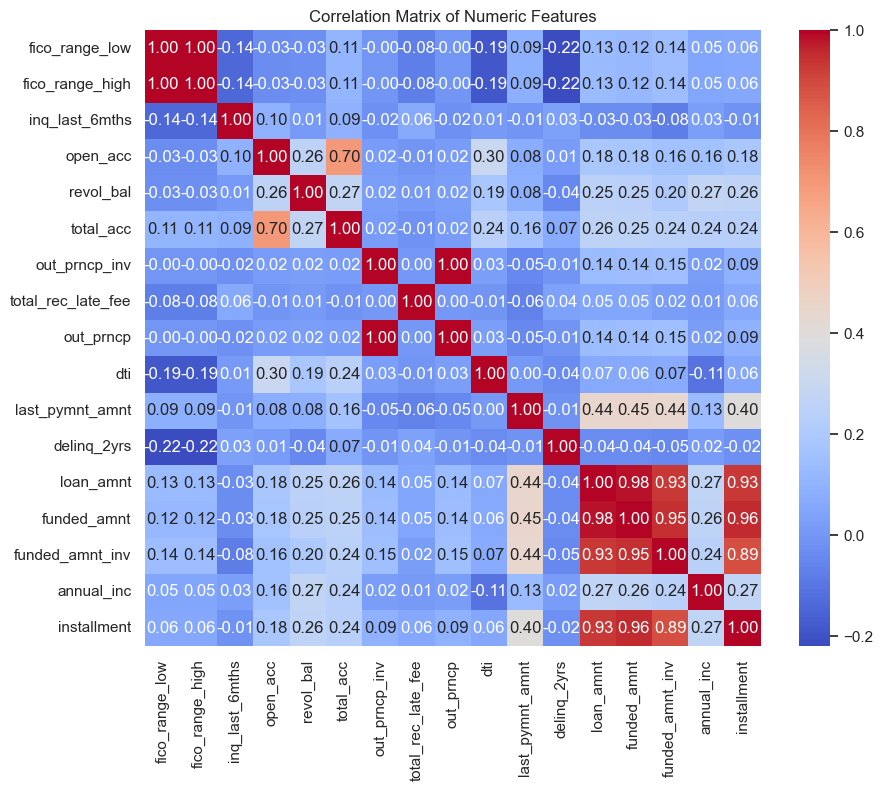

In [159]:
# Compute the correlation matrix
corr = loan[numeric_features].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Preprocess Cat./Num Columns

In [245]:
feature_names = categorical_features + numeric_features
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Loan status to binary [0,1]

In [246]:
# Define the target variable
y = loan['loan_status'].map({'current': 0, 'default': 1})  # Convert to binary
X = loan.drop('loan_status', axis=1)

### Train, Test, Split

In [247]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X[feature_names], y, test_size=0.3, random_state=0)

## Anomoly Detection:

In [252]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100,
                             contamination=0.01, # use 'auto'
                             random_state=42)

# Fit the model
iso_forest.fit(X)

# Predict anomalies (-1 for anomalies, 1 for normal)
anomalies = iso_forest.predict(X)

# Add the anomalies to the original data (optional)
loan['anomaly'] = anomalies


### Predict Anomlies

In [253]:
# Filter the anomalies
anomalies_data = loan[loan['anomaly'] == -1]

# Analyze the anomalies
print(f"Number of anomalies detected {anomalies_data.shape[0]} ", )

Number of anomalies detected 298 


In [254]:
anomalies_data

id     member_id   loan_amnt  funded_amnt  funded_amnt_inv  \
278   1064251.00000 1298041.00000  1500.00000   1500.00000       1500.00000   
304   1063843.00000 1282549.00000  4000.00000   4000.00000       4000.00000   
1057  1049079.00000 1280250.00000 31300.00000  31300.00000      31250.00000   
1180  1047458.00000 1278540.00000 30000.00000  30000.00000      30000.00000   
1228  1046407.00000 1277245.00000  7000.00000   7000.00000       7000.00000   
...             ...           ...         ...          ...              ...   
29403  240967.00000  240898.00000  1800.00000   1800.00000        900.00000   
29436  233258.00000  233219.00000  8975.00000   8975.00000       2875.00000   
29444  229063.00000  214505.00000  6600.00000   6600.00000       2650.00000   
29585  156877.00000  156873.00000  8400.00000   8400.00000       1825.00000   
29657  138767.00000  138753.00000 25000.00000  25000.00000       2450.00280   

          term  int_rate  installment grade sub_grade  ... last_credit_pull_d  \
278   36.00000  18.64000     54.72000     E        E1  ...           Sep-2016   
304   36.00000  16.29000    141.21000     D        D1  ...           Sep-2016   
1057  60.00000  20.30000    834.50000     E        E5  ...           Apr-2012   
1180  36.00000  19.42000   1106.07000     E        E3  ...           Sep-2016   
1228  60.00000  18.64000    180.21000     E        E1  ...           Jun-2012   
...        ...       ...          ...   ...       ...  ...                ...   
29403 36.00000  13.93000     61.46000     E        E1  ...           Sep-2016   
29436 36.00000  15.20000    312.01000     E        E5  ...           Mar-2010   
29444 36.00000  15.51000    230.45000     F        F1  ...           Aug-2015   
29585 36.00000  13.75000    286.08000     E        E2  ...           Nov-2010   
29657 36.00000  15.33000    870.68000     F        F2  ...           Sep-2016   

      collections_12_mths_ex_med policy_code  application_type acc_now_delinq  \
278                      0.00000     1.00000        INDIVIDUAL        0.00000   
304                      0.00000     1.00000        INDIVIDUAL        0.00000   
1057                     0.00000     1.00000        INDIVIDUAL        0.00000   
1180                     0.00000     1.00000        INDIVIDUAL        0.00000   
1228                     0.00000     1.00000        INDIVIDUAL        0.00000   
...                          ...         ...               ...            ...   
29403                    0.00000     1.00000        INDIVIDUAL        0.00000   
29436                    0.00000     1.00000        INDIVIDUAL        0.00000   
29444                    0.00000     1.00000        INDIVIDUAL        0.00000   
29585                    0.00000     1.00000        INDIVIDUAL        0.00000   
29657                    0.00000     1.00000        INDIVIDUAL        0.00000   

      chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  \
278                    0.00000     0.00000              0.00000   0.00000   
304                    0.00000     0.00000              0.00000   0.00000   
1057                   0.00000     0.00000              0.00000   0.00000   
1180                   0.00000     0.00000              0.00000   0.00000   
1228                   0.00000     0.00000              0.00000   0.00000   
...                        ...         ...                  ...       ...   
29403                  0.00000     0.00000                  NaN   0.00000   
29436                  0.00000     0.00000                  NaN   0.00000   
29444                  0.00000     0.00000                  NaN   0.00000   
29585                  0.00000     0.00000                  NaN   0.00000   
29657                  0.00000     0.00000                  NaN   0.00000   

      anomaly  
278        -1  
304        -1  
1057       -1  
1180       -1  
1228       -1  
...       ...  
29403      -1  
29436      -1  
29444      -1  
29585      -1  
29657      -1  

[298

### Explain Anomolies

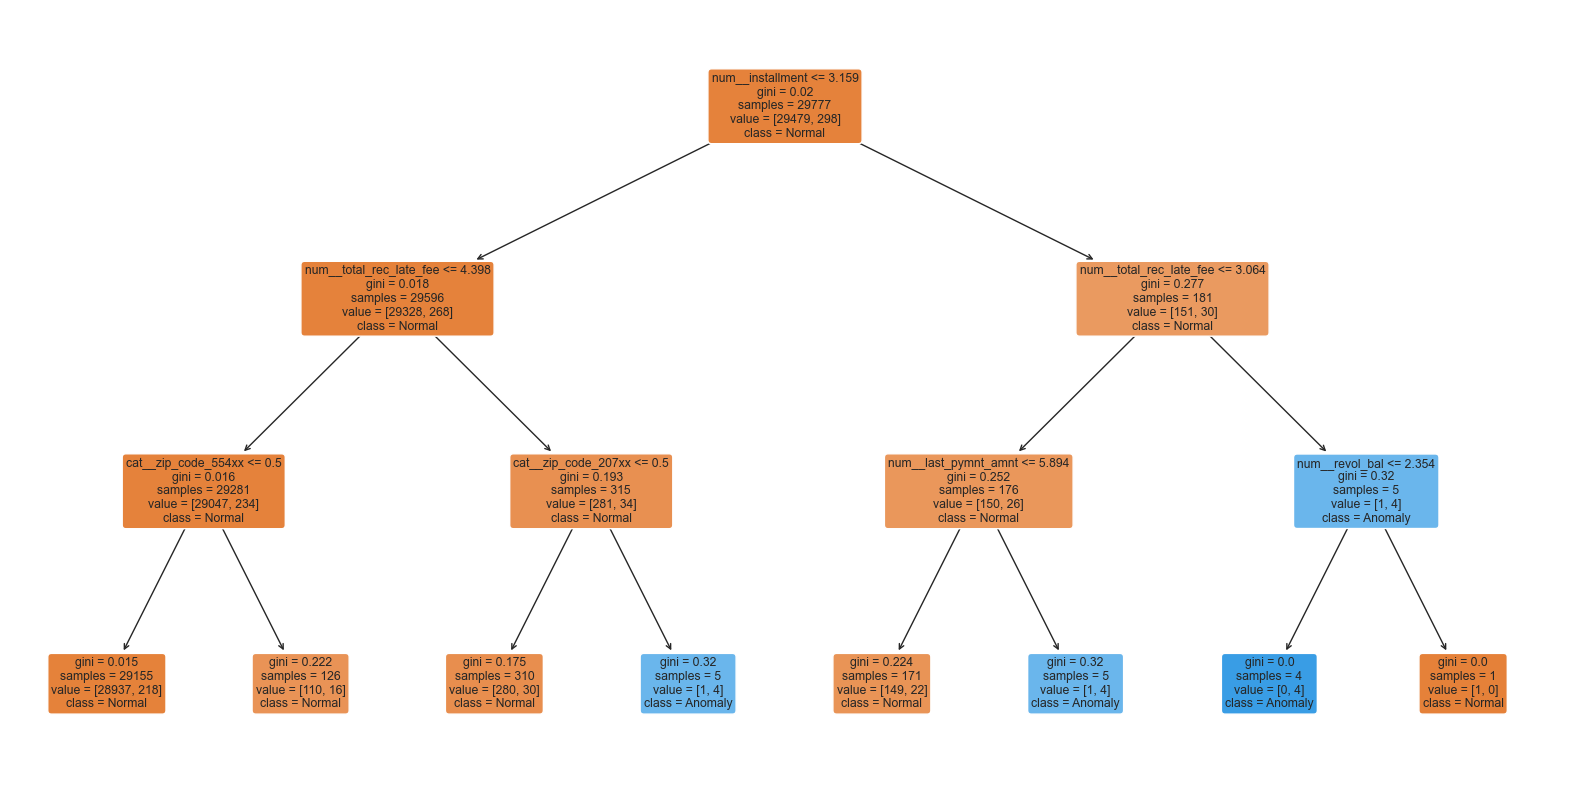

In [256]:
# Create a pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))])

y = loan['anomaly'] == -1
X_anomaly = loan.drop(columns='anomaly')


# Fit the pipeline to the data
pipeline.fit(X_anomaly, y)

# Corrected plot_tree command with appropriate class names
plt.figure(figsize=(20, 10))
plot_tree(pipeline.named_steps['classifier'],
          filled=True,
          feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out(),
          class_names=['Normal', 'Anomaly'], # Corrected class names
          rounded=True)
plt.show()


### Decision Tree for Anomolies

In [ ]:
# Create a pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))])

# Fit the pipeline to the anomalies data
# We need to filter the original 'X' for the anomalies and use a dummy target since the Isolation Forest doesn't provide one
# X_anomalies_original = X.iloc[anomalies_adjusted == -1]

y = data['anomaly'] == -1
X_anomaly = loan.drop(columns='anomaly')


# Fit the pipeline to the data
pipeline.fit(X_anomaly, y)

# Corrected plot_tree command with appropriate class names
plt.figure(figsize=(20, 10))
plot_tree(pipeline.named_steps['classifier'],
          filled=True,
          feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out(),
          class_names=['Normal', 'Anomaly'], # Corrected class names
          rounded=True)
plt.show()


## Baseline Model - Logistic Reg:

#### LogReg Pipeline/Train

In [35]:
# Define the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=0, max_iter=300))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'last_pymnt_amnt',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'fun...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 LogisticRegression(max_iter=300, random_state=0))])

#### Model Predictions and Performance Metrics

In [36]:
y_train_pred = lr_pipeline.predict(X_train)
y_train_prob = lr_pipeline.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = lr_pipeline.predict(X_test)
y_test_prob = lr_pipeline.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")


Training Metrics:
Accuracy: 0.97
Precision (default): 0.96
Recall (default): 0.86
F1 Score (default): 0.91
AUC: 0.99

Test Metrics:
Accuracy: 0.91
Precision (default): 0.81
Recall (default): 0.55
F1 Score (default): 0.66
AUC: 0.94


### ROC & PR Curves

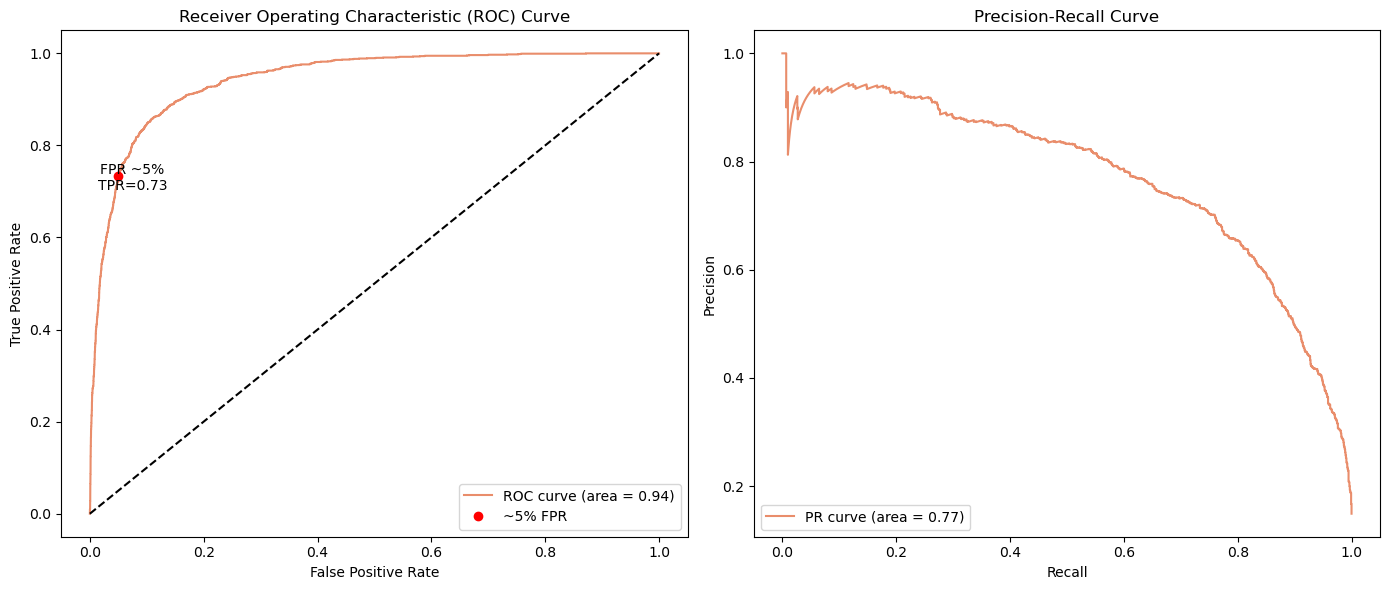

In [37]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### ROC W/ Score Threshold

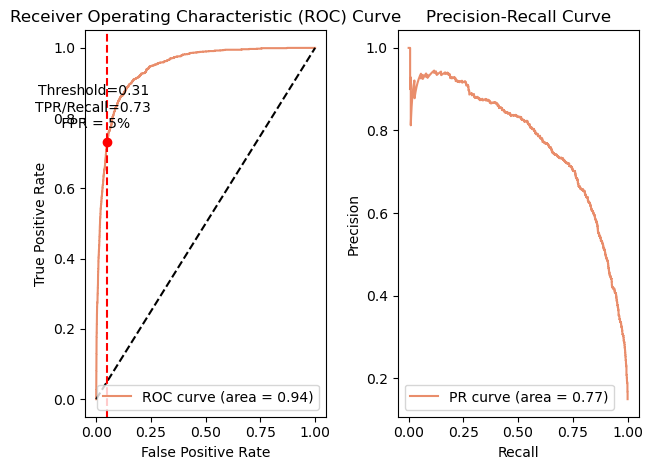

In [38]:
# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~5% FPR
plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

# Adding a text annotation for the threshold
plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 5%', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### PR Curve w/ Threshold

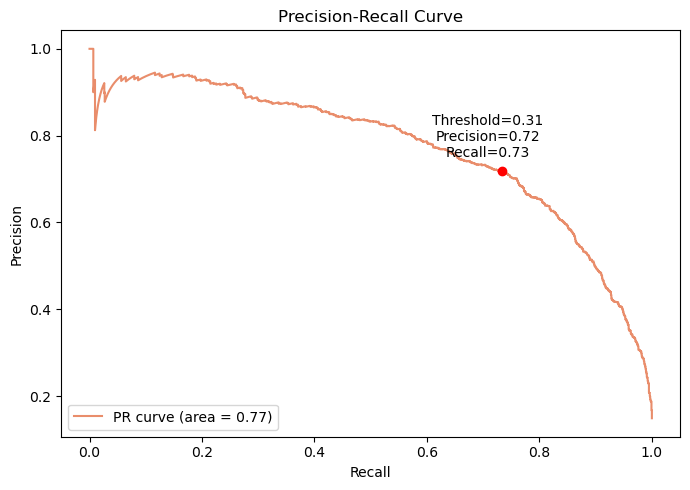

In [39]:
# Find the closest threshold in the PR curve to the one identified in the ROC curve analysis
# This might not be exact due to the different metrics, but we find the nearest one
roc_threshold = thresholds_roc[idx]
closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
selected_precision = precision[closest_threshold_index]
selected_recall = recall[closest_threshold_index]

plt.figure(figsize=(7, 5))

# Plot PR Curve
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Highlight the selected threshold
plt.plot(selected_recall, selected_precision, 'ro')  # Red dot at the selected threshold
plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')

plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

### Operating Table

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df_rf = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df_rf

Target FPR: 0.01, Expected TPR: 0.3761, Threshold: 0.7274
Target FPR: 0.02, Expected TPR: 0.5285, Threshold: 0.5294
Target FPR: 0.03, Expected TPR: 0.6074, Threshold: 0.4409
Target FPR: 0.04, Expected TPR: 0.6644, Threshold: 0.3755
Target FPR: 0.05, Expected TPR: 0.7327, Threshold: 0.3133
Target FPR: 0.06, Expected TPR: 0.7635, Threshold: 0.2788
Target FPR: 0.07, Expected TPR: 0.7838, Threshold: 0.2512
Target FPR: 0.08, Expected TPR: 0.8101, Threshold: 0.2291
Target FPR: 0.09, Expected TPR: 0.8303, Threshold: 0.2054
Target FPR: 0.10, Expected TPR: 0.8461, Threshold: 0.1895


Target FPR (%)  Expected TPR  Threshold
0         1.00000       0.37613    0.72739
1         2.00000       0.52853    0.52938
2         3.00000       0.60736    0.44088
3         4.00000       0.66441    0.37548
4         5.00000       0.73273    0.31327
5         6.00000       0.76351    0.27885
6         7.00000       0.78378    0.25121
7         8.00000       0.81006    0.22913
8         9.00000       0.83033    0.20540
9        10.00000       0.84610    0.18949

## Model 1 - RandomForest:

#### Baseline RF:


##### Train Baseline Model

In [41]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=500,
                                                                    max_depth=100,
                                                                    n_jobs=-1,
                                                                    random_state=42))])
# Train the pipeline
rf_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'last_pymnt_amnt',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'fun...
                                                  ['pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=100, n_estimators=500,
                                        n_jobs=-1, random_state=42))])

##### Baseline Performance Metrics

In [42]:
y_train_pred = rf_pipeline.predict(X_train)
y_train_prob = rf_pipeline.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = rf_pipeline.predict(X_test)
y_test_prob = rf_pipeline.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")


Training Metrics:
Accuracy: 0.95
Precision (default): 1.00
Recall (default): 0.68
F1 Score (default): 0.81
AUC: 1.00

Test Metrics:
Accuracy: 0.85
Precision (default): 0.00
Recall (default): 0.00
F1 Score (default): 0.00
AUC: 0.87


### Optimized Random Forest:

##### Finding best parameters

###### Un-comment to run tuning

In [43]:
# Create the parameter grid
#param_grid = {
#    'classifier__n_estimators': [100, 150, 200, 250],
#    'classifier__max_depth': [None, 5, 10, 15],
#    'classifier__min_samples_split': [1,3, 5, 10],
#    'classifier__min_samples_leaf': [1, 2, 4]
#}

# Instantiate the GridSearchCV object
#grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
#grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
#best_params = grid_search.best_params_

# Print the best set of hyperparameters
#print("Best parameters:")
#for key, value in best_params.items():
#    print(f"  {key}: {value}")

##### Results of CV

In [44]:
#cv_results_df = pd.DataFrame(grid_search.cv_results_)
#cv_results_df

##### Best Parameters

In [45]:
#best_params

##### Refit with Best Parameters

In [46]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
rf_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=250,
                                                                    max_depth=100,
                                                                    n_jobs=-1,
                                                                    min_samples_split=5,
                                                                    random_state=42))])
rf_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'last_pymnt_amnt',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'fun...
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=100, min_samples_split=5,
                                        n_estimators=250, n_jobs=-1,
                                        random_state=42))])

##### Optimized Model Performance Metrics

In [47]:
y_train_pred = rf_pipeline_hpo.predict(X_train)
y_train_prob = rf_pipeline_hpo.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = rf_pipeline_hpo.predict(X_test)
y_test_prob = rf_pipeline_hpo.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")


Training Metrics:
Accuracy: 0.92
Precision (default): 1.00
Recall (default): 0.44
F1 Score (default): 0.61
AUC: 1.00

Test Metrics:
Accuracy: 0.85
Precision (default): 0.00
Recall (default): 0.00
F1 Score (default): 0.00
AUC: 0.86


### ROC & PR Curves

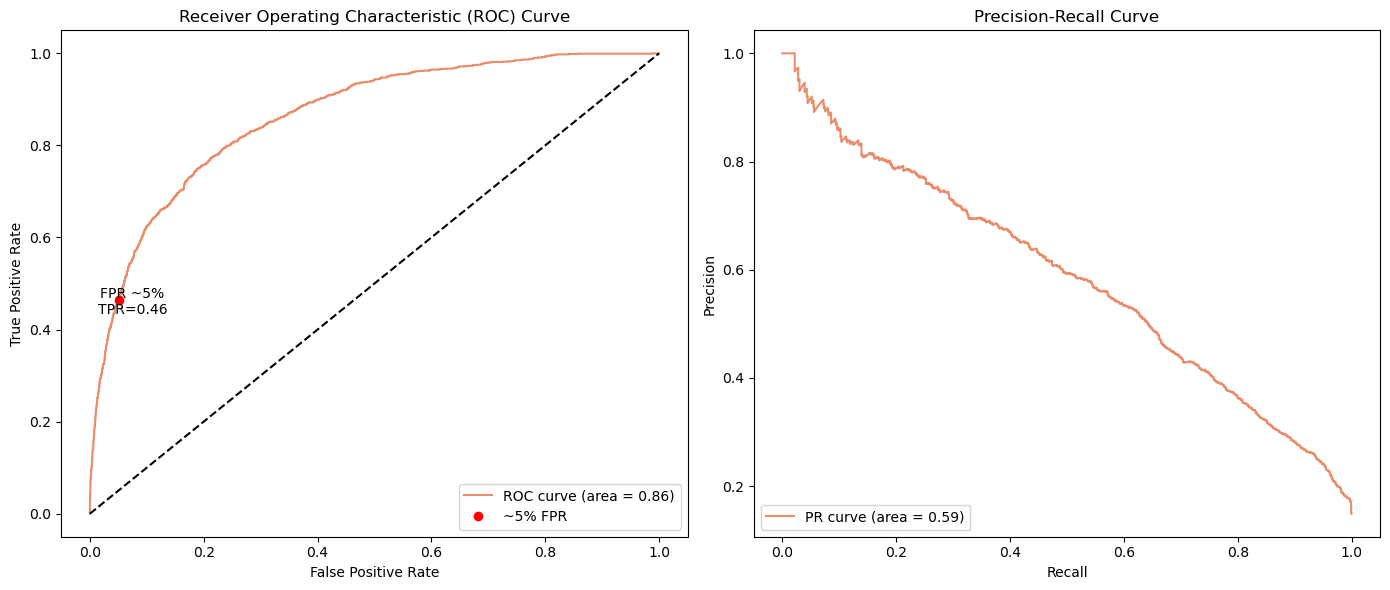

In [48]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### ROC w/ Score Threshold

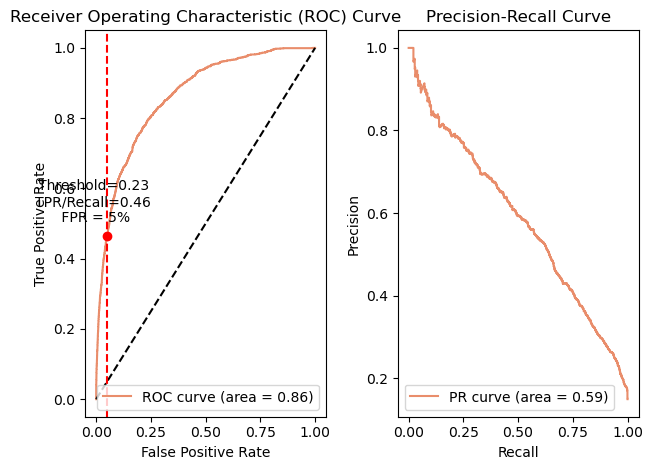

In [49]:
# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~5% FPR
plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

# Adding a text annotation for the threshold
plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 5%', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### PR Curve w/ Threshold

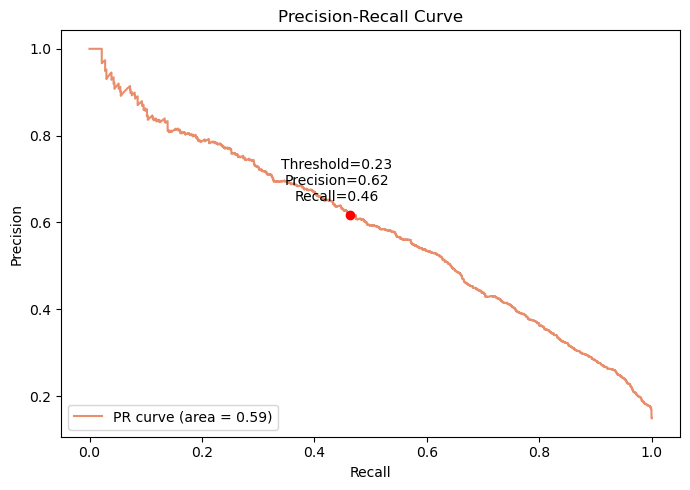

In [50]:
# Find the closest threshold in the PR curve to the one identified in the ROC curve analysis
# This might not be exact due to the different metrics, but we find the nearest one
roc_threshold = thresholds_roc[idx]
closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
selected_precision = precision[closest_threshold_index]
selected_recall = recall[closest_threshold_index]

plt.figure(figsize=(7, 5))

# Plot PR Curve
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Highlight the selected threshold
plt.plot(selected_recall, selected_precision, 'ro')  # Red dot at the selected threshold
plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')

plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

### Operating Table:

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df_rf = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df_rf

Target FPR: 0.01, Expected TPR: 0.2125, Threshold: 0.3013
Target FPR: 0.02, Expected TPR: 0.3011, Threshold: 0.2722
Target FPR: 0.03, Expected TPR: 0.3709, Threshold: 0.2539
Target FPR: 0.04, Expected TPR: 0.4257, Threshold: 0.2401
Target FPR: 0.05, Expected TPR: 0.4640, Threshold: 0.2309
Target FPR: 0.06, Expected TPR: 0.4985, Threshold: 0.2221
Target FPR: 0.07, Expected TPR: 0.5435, Threshold: 0.2133
Target FPR: 0.08, Expected TPR: 0.5713, Threshold: 0.2051
Target FPR: 0.09, Expected TPR: 0.5968, Threshold: 0.1977
Target FPR: 0.10, Expected TPR: 0.6231, Threshold: 0.1907


Target FPR (%)  Expected TPR  Threshold
0         1.00000       0.21246    0.30129
1         2.00000       0.30105    0.27221
2         3.00000       0.37087    0.25391
3         4.00000       0.42568    0.24013
4         5.00000       0.46396    0.23091
5         6.00000       0.49850    0.22215
6         7.00000       0.54354    0.21325
7         8.00000       0.57132    0.20509
8         9.00000       0.59685    0.19767
9        10.00000       0.62312    0.19072

## Model 2 - (GBM):

#### Baseline GBM:

##### Train Baseline Model

In [52]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(
                                                                        learning_rate=0.2, 
                                                                        n_estimators=200,
                                                                        max_depth=10,
                                                                        min_samples_split=2,                         
                                                                        min_samples_leaf=3
                                                                    ))])
# Train the pipeline
gbm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'last_pymnt_amnt',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'fun...
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=10,
                                            min_samples_leaf=3,
                                            n_estimators=200))])

##### Baseline Performance Measure

In [53]:
y_train_pred = gbm_pipeline.predict(X_train)
y_train_prob = gbm_pipeline.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = gbm_pipeline.predict(X_test)
y_test_prob = gbm_pipeline.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")


Training Metrics:
Accuracy: 1.00
Precision (default): 1.00
Recall (default): 1.00
F1 Score (default): 1.00
AUC: 1.00

Test Metrics:
Accuracy: 0.95
Precision (default): 0.89
Recall (default): 0.73
F1 Score (default): 0.80
AUC: 0.98


#### Optimized GBM:

##### Find best parameters

###### Uncomment to run gridsearch

In [54]:
# Create the parameter grid
#param_grid = {
#    'classifier__n_estimators': [150,200,250],
#    'classifier__learning_rate': [0.1,.15, 0.2],
#}

# More in-debth parameters
#param_grid = {
#    'classifier__n_estimators': [100,150,200,250],
#    'classifier__learning_rate': [0.05, 0.1,.15, 0.2],
#    'classifier__max_depth': [None, 1, 2, 3, 5, 10],
#    'classifier__min_samples_split': [0.1, 1.0, 10],
#    'classifier__min_samples_leaf': [0.1, 0.5, 1.0, 5]
#}


# Instantiate the GridSearchCV object
#grid_search = GridSearchCV(gbm_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
#grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
#best_params = grid_search.best_params_

# Print the best set of hyperparameters
#print("Best parameters:")
#for key, value in best_params.items():
#    print(f"  {key}: {value}")

##### Result of CV

In [55]:
#cv_results_df = pd.DataFrame(grid_search.cv_results_)
#cv_results_df.head()

##### Best parameters

In [56]:
#best_params

##### Refit Model w/ new Parameters

In [57]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
gbm_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(
                                                                        learning_rate=0.1, 
                                                                        n_estimators=250,
                                                                        max_depth=10,
                                                                        min_samples_split=2,                         
                                                                        min_samples_leaf=3
                                                                    ))])
# Train the pipeline
gbm_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'last_pymnt_amnt',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'fun...
                                                  ['pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=10, min_samples_leaf=3,
                                            n_estimators=250))])

##### Optimized Model Performance Metrics

In [58]:
y_train_pred = gbm_pipeline_hpo.predict(X_train)
y_train_prob = gbm_pipeline_hpo.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = gbm_pipeline_hpo.predict(X_test)
y_test_prob = gbm_pipeline_hpo.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")


Training Metrics:
Accuracy: 0.99
Precision (default): 0.99
Recall (default): 0.97
F1 Score (default): 0.98
AUC: 1.00

Test Metrics:
Accuracy: 0.95
Precision (default): 0.90
Recall (default): 0.71
F1 Score (default): 0.79
AUC: 0.98


### ROC & PR Curves

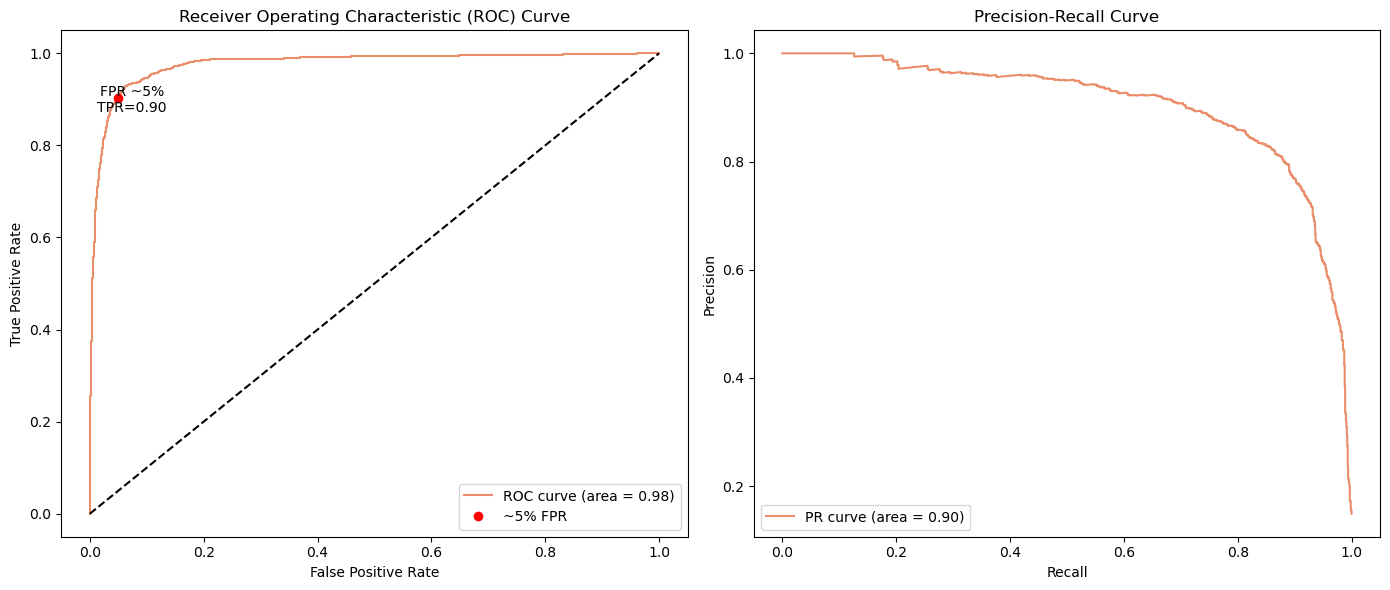

In [59]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### ROC w/ Score Threshold

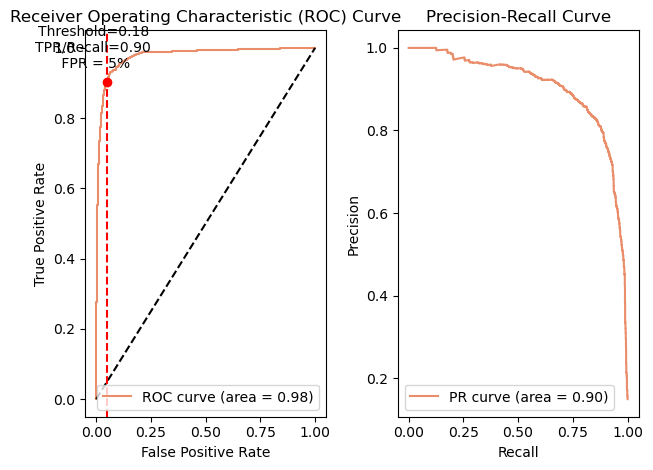

In [60]:
# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~5% FPR
plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

# Adding a text annotation for the threshold
plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 5%', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### PR Curve w/ Threshold

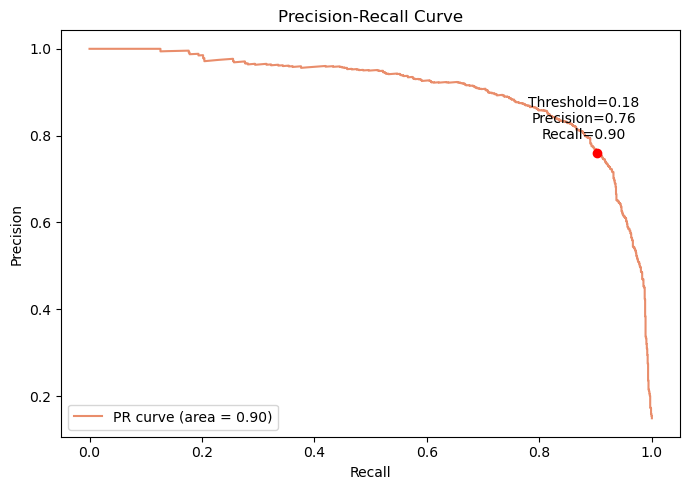

In [61]:
# Find the closest threshold in the PR curve to the one identified in the ROC curve analysis
# This might not be exact due to the different metrics, but we find the nearest one
roc_threshold = thresholds_roc[idx]
closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
selected_precision = precision[closest_threshold_index]
selected_recall = recall[closest_threshold_index]

plt.figure(figsize=(7, 5))

# Plot PR Curve
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Highlight the selected threshold
plt.plot(selected_recall, selected_precision, 'ro')  # Red dot at the selected threshold
plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')

plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

### Operating Table:

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df_rf = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df_rf

Target FPR: 0.01, Expected TPR: 0.6637, Threshold: 0.5735
Target FPR: 0.02, Expected TPR: 0.7748, Threshold: 0.3915
Target FPR: 0.03, Expected TPR: 0.8483, Threshold: 0.2711
Target FPR: 0.04, Expected TPR: 0.8874, Threshold: 0.2146
Target FPR: 0.05, Expected TPR: 0.9032, Threshold: 0.1755
Target FPR: 0.06, Expected TPR: 0.9234, Threshold: 0.1494
Target FPR: 0.07, Expected TPR: 0.9324, Threshold: 0.1315
Target FPR: 0.08, Expected TPR: 0.9362, Threshold: 0.1182
Target FPR: 0.09, Expected TPR: 0.9407, Threshold: 0.1083
Target FPR: 0.10, Expected TPR: 0.9474, Threshold: 0.0998


Target FPR (%)  Expected TPR  Threshold
0         1.00000       0.66366    0.57353
1         2.00000       0.77477    0.39150
2         3.00000       0.84835    0.27114
3         4.00000       0.88739    0.21457
4         5.00000       0.90315    0.17549
5         6.00000       0.92342    0.14941
6         7.00000       0.93243    0.13150
7         8.00000       0.93619    0.11821
8         9.00000       0.94069    0.10826
9        10.00000       0.94745    0.09977

## Model 3: Neural Network (MLP)

### Baseline MLP:

#### Train MLP

In [63]:
# Define the Logistic Regression pipeline
mlp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', MLPClassifier(hidden_layer_sizes=(50,10),
                                max_iter=1000,
                                alpha=1e-4,
                                solver='sgd',
                                verbose=0,
                                tol=1e-4,
                                learning_rate_init=.1,
                                random_state=42))
])

# Train the Logistic Regression model
mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'last_pymnt_amnt',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'fun...
                                                   'acc_now_delinq', 'term',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(50, 10),
                               learning_rate_init=0.1, max_iter=1000,
                               random_state=42, solver='sgd', verbose=0))])

#### Baseline Model Performance Metrics

In [64]:
y_train_pred = mlp_pipeline.predict(X_train)
y_train_prob = mlp_pipeline.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = mlp_pipeline.predict(X_test)
y_test_prob = mlp_pipeline.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")


Training Metrics:
Accuracy: 1.00
Precision (default): 1.00
Recall (default): 1.00
F1 Score (default): 1.00
AUC: 1.00

Test Metrics:
Accuracy: 0.91
Precision (default): 0.73
Recall (default): 0.64
F1 Score (default): 0.68
AUC: 0.93


### Optimized MLP:

##### Find best parameters

###### Un-comment to run tuning

In [65]:
#param_grid = {
#    'classifier__learning_rate_init': [0.1, 0.001, 1,5],
#    'classifier__alpha': [0.1, 0.001, 1]
#}

# Instantiate the GridSearchCV object
#grid_search = RandomizedSearchCV(mlp_pipeline, param_grid, n_iter=2, cv=3, n_jobs=-1, scoring='roc_auc', verbose=2, random_state=42)

# Fit the GridSearchCV object to the training data
#grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
#best_params = grid_search.best_params_

# Print the best set of hyperparameters
#print("Best parameters:")
#for key, value in best_params.items():
#    print(f"  {key}: {value}")

##### Result of CV

In [66]:
#cv_results_df = pd.DataFrame(grid_search.cv_results_)
#cv_results_df.head()

##### Best parameters

In [67]:
#best_params

##### Refit Model w/ new Parameters

In [68]:
# Define the pipeline
mlp_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', MLPClassifier(
                                hidden_layer_sizes=(50,10),
                                max_iter=1000,
                                alpha=1,
                                solver='sgd',
                                verbose=0,
                                tol=1e-4,
                                learning_rate_init=.001,
                                random_state=42))
])

# Train the Logistic Regression model
mlp_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'last_pymnt_amnt',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'fun...
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 MLPClassifier(alpha=1, hidden_layer_sizes=(50, 10),
                               max_iter=1000, random_state=42, solver='sgd',
                               verbose=0))])

#### Optimized Model Performance Metrics

In [69]:
y_train_pred = mlp_pipeline_hpo.predict(X_train)
y_train_prob = mlp_pipeline_hpo.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = mlp_pipeline_hpo.predict(X_test)
y_test_prob = mlp_pipeline_hpo.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")


Training Metrics:
Accuracy: 0.99
Precision (default): 0.98
Recall (default): 0.97
F1 Score (default): 0.97
AUC: 1.00

Test Metrics:
Accuracy: 0.92
Precision (default): 0.77
Recall (default): 0.62
F1 Score (default): 0.69
AUC: 0.95


### ROC & PR Curves

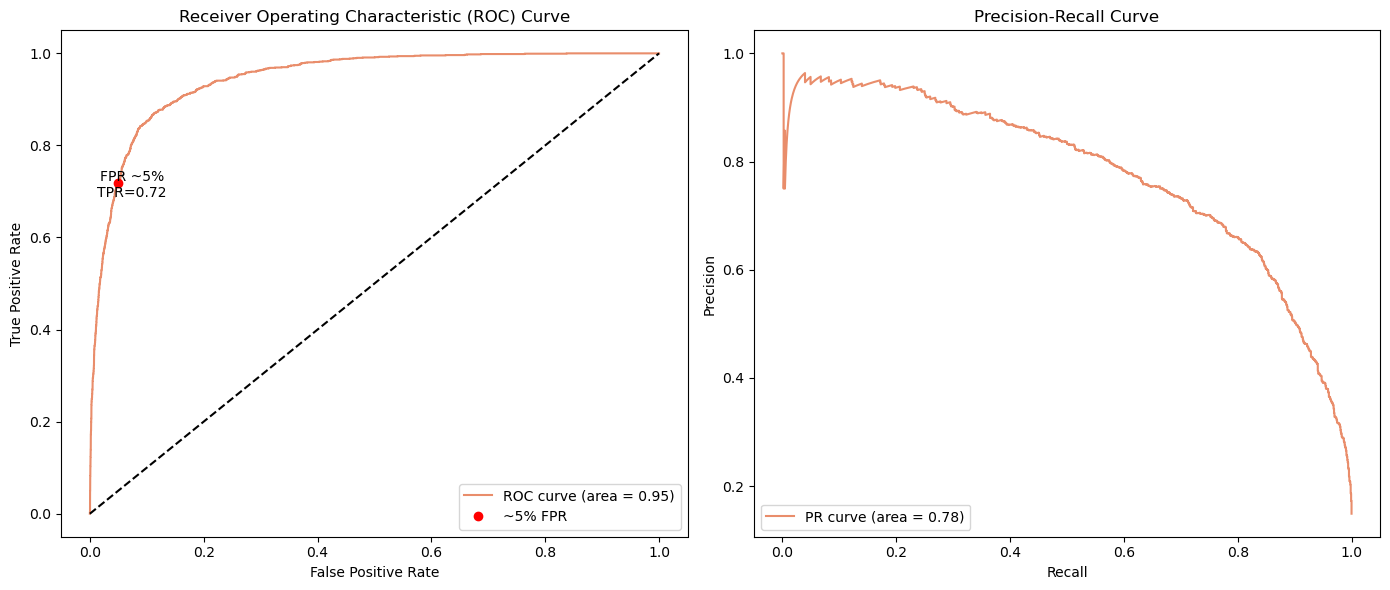

In [70]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### ROC w/ Score Threshold

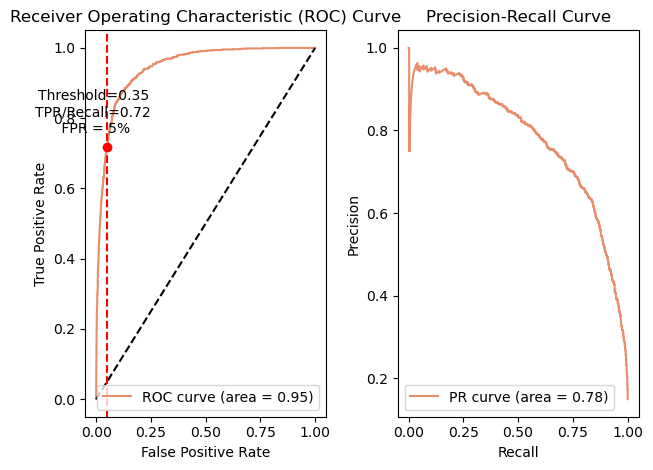

In [71]:
# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~5% FPR
plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

# Adding a text annotation for the threshold
plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 5%', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### PR Curve w/ Threshold

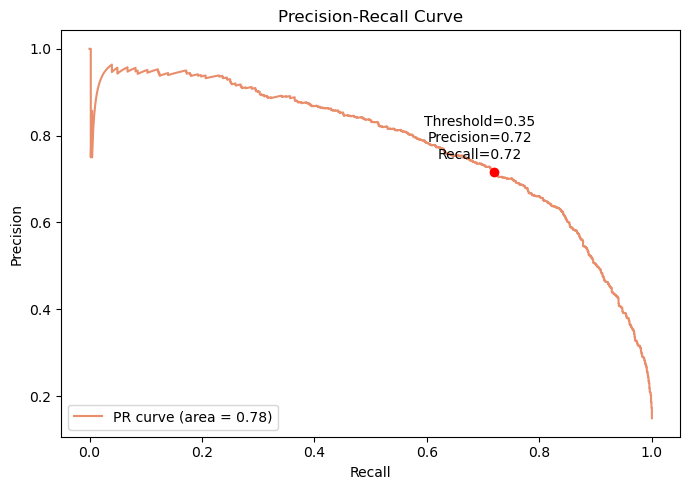

In [72]:
# Find the closest threshold in the PR curve to the one identified in the ROC curve analysis
# This might not be exact due to the different metrics, but we find the nearest one
roc_threshold = thresholds_roc[idx]
closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
selected_precision = precision[closest_threshold_index]
selected_recall = recall[closest_threshold_index]

plt.figure(figsize=(7, 5))

# Plot PR Curve
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Highlight the selected threshold
plt.plot(selected_recall, selected_precision, 'ro')  # Red dot at the selected threshold
plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')

plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

### Operating Table:

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df_rf = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df_rf

Target FPR: 0.01, Expected TPR: 0.3911, Threshold: 0.7973
Target FPR: 0.02, Expected TPR: 0.5210, Threshold: 0.6204
Target FPR: 0.03, Expected TPR: 0.6066, Threshold: 0.5172
Target FPR: 0.04, Expected TPR: 0.6749, Threshold: 0.4150
Target FPR: 0.05, Expected TPR: 0.7185, Threshold: 0.3511
Target FPR: 0.06, Expected TPR: 0.7628, Threshold: 0.2969
Target FPR: 0.07, Expected TPR: 0.7868, Threshold: 0.2664
Target FPR: 0.08, Expected TPR: 0.8191, Threshold: 0.2346
Target FPR: 0.09, Expected TPR: 0.8423, Threshold: 0.2063
Target FPR: 0.10, Expected TPR: 0.8536, Threshold: 0.1834


Target FPR (%)  Expected TPR  Threshold
0         1.00000       0.39114    0.79734
1         2.00000       0.52102    0.62037
2         3.00000       0.60661    0.51718
3         4.00000       0.67492    0.41504
4         5.00000       0.71847    0.35113
5         6.00000       0.76276    0.29693
6         7.00000       0.78679    0.26644
7         8.00000       0.81907    0.23463
8         9.00000       0.84234    0.20627
9        10.00000       0.85360    0.18338

## Model 4: Stacking Classifier

### Baseline StackingClassifier:

#### Train Classifier

In [74]:
# base estimators for stacker
base_estimators = [
    ('gbm', GradientBoostingClassifier(n_estimators=30, learning_rate=1.0, max_depth=3, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=25, random_state=42)),
    ('nn', MLPClassifier(random_state=42))
]

# final estimator on top
final_estimator = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=3,
    n_jobs=-1
)

stacking_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', stacking_classifier)])

# fit stacking pipeline
stacking_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'last_pymnt_amnt',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'fun...
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 StackingClassifier(cv=3,
                                    estimators=[('gbm',
                                                 GradientBoostingClassifier(learning_rate=1.0,
                                                                            n_estimators=30,
                                                                            random_state=42)),
                                                ('rf',
                                                 RandomForestClassifier(n_estimators=25,
                                                                        random_state=42)),
                                                ('nn',
                                                 MLPClassifier(random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

#### Baseline Model Performence Metrics

In [75]:
y_train_pred = stacking_pipeline.predict(X_train)
y_train_prob = stacking_pipeline.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = stacking_pipeline.predict(X_test)
y_test_prob = stacking_pipeline.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")


Training Metrics:
Accuracy: 0.99
Precision (default): 0.95
Recall (default): 0.95
F1 Score (default): 0.95
AUC: 1.00

Test Metrics:
Accuracy: 0.93
Precision (default): 0.83
Recall (default): 0.64
F1 Score (default): 0.72
AUC: 0.95


### Optimized Stacking Classifier:

##### Find best parameters

In [76]:
#param_distributions = {
#    'classifier__gbm__n_estimators': randint (10,100,200),
#    'classifier__gbm__learning_rate': [0.01, 0.1, 0.5, 1.0],
#    'classifier__gbm__max_depth': randint(3, 10),
#    'classifier__rf__n_estimators': randint(10, 100),
#    'classifier__rf__max_depth': randint(3,10),
#    'classifier__rf__min_samples_split': randint(3,40),
#    'classifier__rf__min_samples_leaf': randint(3,10),
#    'classifier__nn__alpha': [0.0001, 0.001, 0.01, 0.1],
#}

# Create the RandomizedSearchCV object. You can adjust n_iter and cv (number of iterations and cross-validation folds).
#random_search = RandomizedSearchCV(stacking_pipeline,
#                                   param_distributions=param_distributions,
#                                   n_iter=2, cv=3, verbose=2, n_jobs=-1,
#                                   scoring='roc_auc', random_state=42)

# Fit the RandomizedSearchCV object to the data
# X_train and _train are your training data and labels, respectively

#random_search.fit(X_train, y_train)

# Best parameters to use for the classifier
#print ("Best parameters found:", random_search.best_params_)

# Use the best estimator directly to make predictions on test data X
#predictions = random_search. predict(X_test)

##### Refit Model w/ new Parameters

In [78]:
# base estimators for stacker
base_estimators = [
    ('gbm', GradientBoostingClassifier(n_estimators=224, learning_rate=0.5, max_depth=6, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=96, random_state=42, min_samples_leaf=7, min_samples_split=21)),
    ('nn', MLPClassifier(alpha=0.01, random_state=42))
]

# final estimator on top
final_estimator = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=3,
    n_jobs=-1
)

stacking_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', stacking_classifier)])

# fit stacking pipeline
stacking_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'last_pymnt_amnt',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'fun...
                ('classifier',
                 StackingClassifier(cv=3,
                                    estimators=[('gbm',
                                                 GradientBoostingClassifier(learning_rate=0.5,
                                                                            max_depth=6,
                                                                            n_estimators=224,
                                                                            random_state=42)),
                                                ('rf',
                                                 RandomForestClassifier(min_samples_leaf=7,
                                                                        min_samples_split=21,
                                                                        n_estimators=96,
                                                                        random_state=42)),
                                                ('nn',
                                                 MLPClassifier(alpha=0.01,
                                                               random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

#### Optimized Model Performence Metrics

In [79]:
y_train_pred = stacking_pipeline.predict(X_train)
y_train_prob = stacking_pipeline.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = stacking_pipeline.predict(X_test)
y_test_prob = stacking_pipeline.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Print Metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision (default): {train_precision:.2f}")
print(f"Recall (default): {train_recall:.2f}")
print(f"F1 Score (default): {train_f1:.2f}")
print(f"AUC: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision (default): {test_precision:.2f}")
print(f"Recall (default): {test_recall:.2f}")
print(f"F1 Score (default): {test_f1:.2f}")
print(f"AUC: {test_auc:.2f}")

Training Metrics:
Accuracy: 1.00
Precision (default): 1.00
Recall (default): 1.00
F1 Score (default): 1.00
AUC: 1.00

Test Metrics:
Accuracy: 0.93
Precision (default): 0.86
Recall (default): 0.66
F1 Score (default): 0.75
AUC: 0.96


### ROC & PR Curves

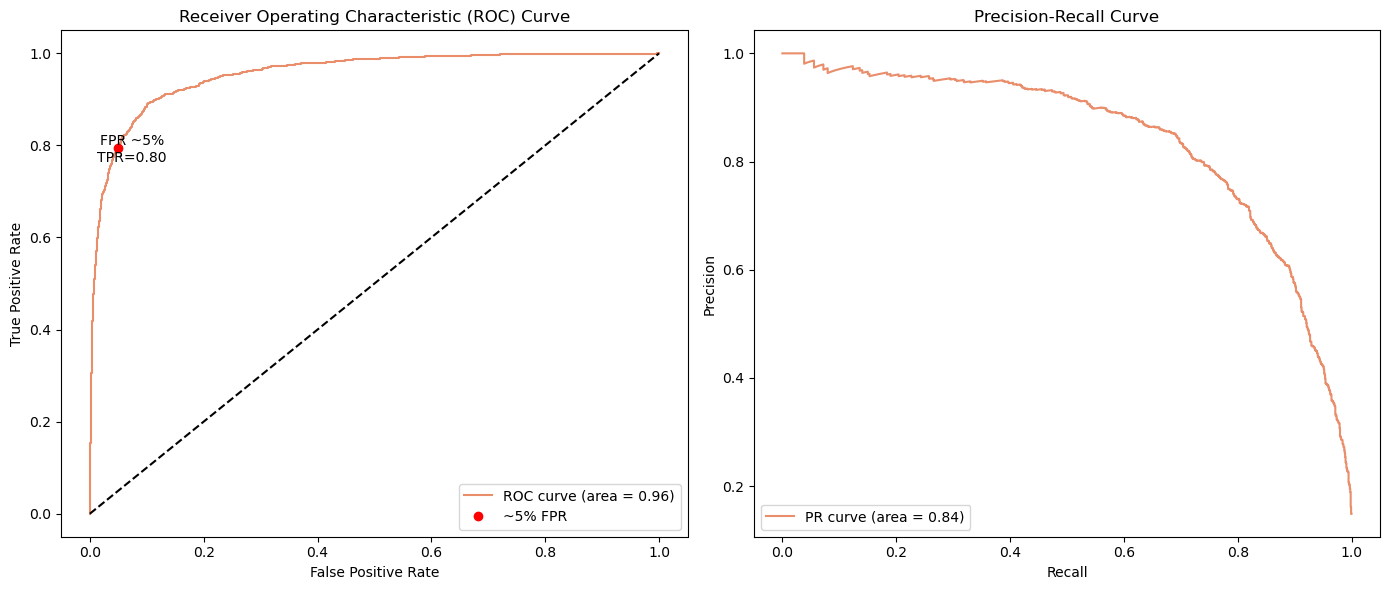

In [80]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlighting the 5% FPR point
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### ROC w/ Score Threshold

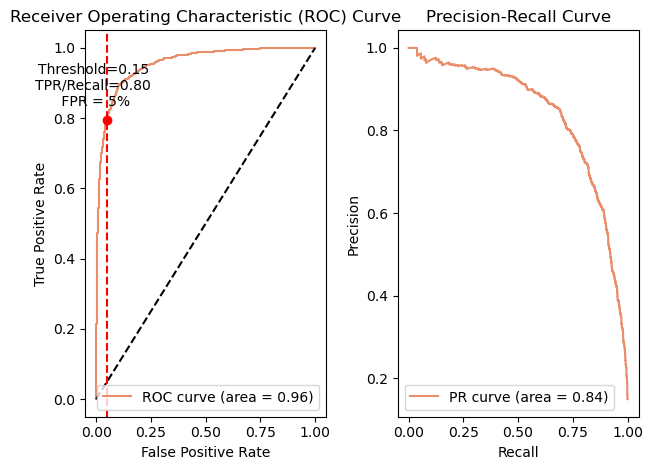

In [81]:
# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~5% FPR
plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

# Adding a text annotation for the threshold
plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 5%', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### PR Curve w/ Threshold

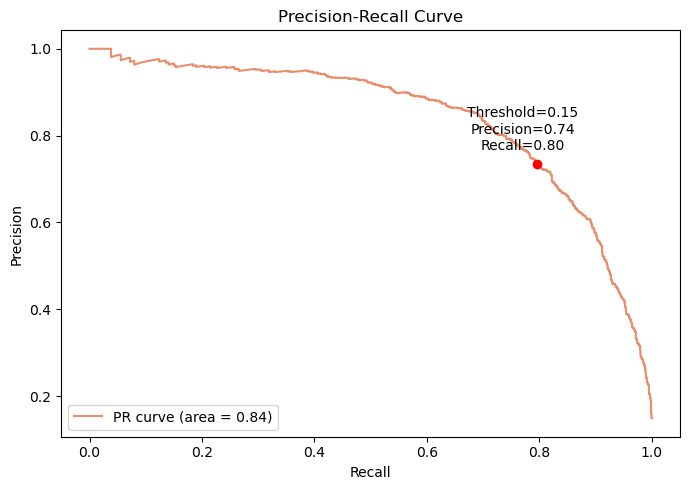

In [82]:
# Find the closest threshold in the PR curve to the one identified in the ROC curve analysis
# This might not be exact due to the different metrics, but we find the nearest one
roc_threshold = thresholds_roc[idx]
closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
selected_precision = precision[closest_threshold_index]
selected_recall = recall[closest_threshold_index]

plt.figure(figsize=(7, 5))

# Plot PR Curve
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Highlight the selected threshold
plt.plot(selected_recall, selected_precision, 'ro')  # Red dot at the selected threshold
plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')

plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

### Operating Table:

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df_rf = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df_rf

Target FPR: 0.01, Expected TPR: 0.5398, Threshold: 0.7065
Target FPR: 0.02, Expected TPR: 0.6794, Threshold: 0.4581
Target FPR: 0.03, Expected TPR: 0.7200, Threshold: 0.3435
Target FPR: 0.04, Expected TPR: 0.7688, Threshold: 0.2207
Target FPR: 0.05, Expected TPR: 0.7950, Threshold: 0.1537
Target FPR: 0.06, Expected TPR: 0.8221, Threshold: 0.1192
Target FPR: 0.07, Expected TPR: 0.8348, Threshold: 0.1010
Target FPR: 0.08, Expected TPR: 0.8551, Threshold: 0.0867
Target FPR: 0.09, Expected TPR: 0.8679, Threshold: 0.0796
Target FPR: 0.10, Expected TPR: 0.8859, Threshold: 0.0727


Target FPR (%)  Expected TPR  Threshold
0         1.00000       0.53979    0.70652
1         2.00000       0.67943    0.45813
2         3.00000       0.71997    0.34352
3         4.00000       0.76877    0.22069
4         5.00000       0.79505    0.15370
5         6.00000       0.82207    0.11921
6         7.00000       0.83483    0.10103
7         8.00000       0.85511    0.08673
8         9.00000       0.86787    0.07959
9        10.00000       0.88589    0.07274

## Feature Importance: All models

#### Logistic Regression Feature Importance:

In [84]:
feature_names = preprocessor.get_feature_names_out()
feature_importance = lr_pipeline.named_steps['classifier'].coef_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance[0]})
feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Logistic Regression coefficients as feature importance
lr_coefficients = lr_pipeline.named_steps['classifier'].coef_[0]

# Aligning feature names and coefficients
lr_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_coefficients})
lr_feature_importance_df = lr_feature_importance_df.sort_values(by='Coefficient', ascending=False)
lr_feature_importance_df.head(10)

Feature  Coefficient
478   cat__last_pymnt_d_Mar-2010      3.53392
502   cat__last_pymnt_d_Oct-2008      3.47435
486   cat__last_pymnt_d_May-2009      3.37718
468   cat__last_pymnt_d_Jun-2009      3.34226
495   cat__last_pymnt_d_Nov-2009      3.25688
511   cat__last_pymnt_d_Sep-2009      3.23725
415   cat__last_pymnt_d_Apr-2009      3.16530
2457       cat__issue_d_Dec-2011      3.08817
433   cat__last_pymnt_d_Dec-2009      3.03502
441   cat__last_pymnt_d_Feb-2009      2.97413

#### Random Forest Feature Importance:

In [85]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

rf_importances = rf_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df.head(10)

Feature  Importance
10     last_pymnt_amnt     0.06542
7   total_rec_late_fee     0.02270
15          annual_inc     0.01172
0       fico_range_low     0.01119
1      fico_range_high     0.01106
14     funded_amnt_inv     0.01089
16         installment     0.00984
9                  dti     0.00981
28      term_36 months     0.00966
4            revol_bal     0.00954

#### GBM Feature Importance:

In [86]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

gbm_hpo_importances = gbm_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
gbm_hpo_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gbm_hpo_importances})
gbm_hpo_importance_df = gbm_hpo_importance_df.sort_values(by='Importance', ascending=False)
gbm_hpo_importance_df.head(10)

Feature  Importance
10         last_pymnt_amnt     0.26784
7       total_rec_late_fee     0.07122
29          term_60 months     0.04198
16             installment     0.03841
518  last_pymnt_d_Sep-2016     0.03328
14         funded_amnt_inv     0.03097
28          term_36 months     0.03049
15              annual_inc     0.01781
4                revol_bal     0.01246
519                grade_A     0.01165

#### Stacking Feature Importance (Permutations):

In [87]:
from sklearn.inspection import permutation_importance
result = permutation_importance(stacking_pipeline, X_test, y_test,
                                n_repeats=10, random_state=42,
                                n_jobs=-1)

##### Feature Names

In [88]:

def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    feature_names = []

    # Loop through each transformer within the ColumnTransformer
    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':  # Skip the 'remainder' transformer, if present
            continue
        if isinstance(transformer, Pipeline):
            # If the transformer is a pipeline, get the last transformer from the pipeline
            transformer = transformer.steps[-1][1]

        if hasattr(transformer, 'get_feature_names_out'):
            # If the transformer has 'get_feature_names_out', use it
            names = list(transformer.get_feature_names_out(columns))
        else:
            # Otherwise, just use the column names directly
            names = list(columns)

        feature_names.extend(names)

    return feature_names

transformed_feature_names = get_feature_names(preprocessor)
transformed_feature_names

['fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'total_acc',
 'out_prncp_inv',
 'total_rec_late_fee',
 'out_prncp',
 'dti',
 'last_pymnt_amnt',
 'delinq_2yrs',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'annual_inc',
 'installment',
 'pub_rec_0.0',
 'pub_rec_1.0',
 'pub_rec_2.0',
 'pub_rec_3.0',
 'pub_rec_4.0',
 'pub_rec_5.0',
 'pub_rec_bankruptcies_0.0',
 'pub_rec_bankruptcies_1.0',
 'pub_rec_bankruptcies_2.0',
 'acc_now_delinq_0.0',
 'acc_now_delinq_1.0',
 'term_36 months',
 'term_60 months',
 'int_rate_10.00%',
 'int_rate_10.01%',
 'int_rate_10.08%',
 'int_rate_10.14%',
 'int_rate_10.20%',
 'int_rate_10.25%',
 'int_rate_10.28%',
 'int_rate_10.33%',
 'int_rate_10.36%',
 'int_rate_10.37%',
 'int_rate_10.38%',
 'int_rate_10.39%',
 'int_rate_10.46%',
 'int_rate_10.51%',
 'int_rate_10.59%',
 'int_rate_10.62%',
 'int_rate_10.64%',
 'int_rate_10.65%',
 'int_rate_10.71%',
 'int_rate_10.74%',
 'int_rate_10.75%',
 'int_rate_10.78%',
 'int_rate_10.

##### Mean Importance

In [89]:
feature_names = numeric_features + categorical_features

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"Feature {feature_names[i]} "
              f"Mean Importance: {result.importances_mean[i]:.3f} "
              f"+/- {result.importances_std[i]:.3f}")


Feature verification_status Mean Importance: 0.120 +/- 0.002
Feature total_acc Mean Importance: 0.110 +/- 0.002
Feature open_acc Mean Importance: 0.070 +/- 0.002
Feature funded_amnt Mean Importance: 0.029 +/- 0.003
Feature revol_util Mean Importance: 0.011 +/- 0.001
Feature emp_title Mean Importance: 0.006 +/- 0.002
Feature term Mean Importance: 0.003 +/- 0.001
Feature addr_state Mean Importance: 0.002 +/- 0.001
Feature int_rate Mean Importance: 0.002 +/- 0.001
Feature acc_now_delinq Mean Importance: 0.002 +/- 0.001
Feature title Mean Importance: 0.002 +/- 0.001
Feature out_prncp_inv Mean Importance: 0.002 +/- 0.001
Feature out_prncp Mean Importance: 0.001 +/- 0.001
Feature funded_amnt_inv Mean Importance: 0.001 +/- 0.000
Feature annual_inc Mean Importance: 0.001 +/- 0.000
Feature total_rec_late_fee Mean Importance: 0.001 +/- 0.000


##### Feature Importance

In [90]:

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,  # Or 'feature_names' if applicable
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False).reset_index(drop=True)
feature_importances_df

Feature  Importance Mean  Importance Std
0    verification_status          0.11990         0.00186
1              total_acc          0.11036         0.00243
2               open_acc          0.06952         0.00160
3            funded_amnt          0.02919         0.00279
4             revol_util          0.01145         0.00095
5              emp_title          0.00594         0.00155
6                   term          0.00252         0.00077
7             addr_state          0.00234         0.00086
8               int_rate          0.00206         0.00065
9         acc_now_delinq          0.00194         0.00077
10                 title          0.00171         0.00065
11         out_prncp_inv          0.00158         0.00055
12       funded_amnt_inv          0.00120         0.00045
13             out_prncp          0.00120         0.00058
14            annual_inc          0.00109         0.00035
15    total_rec_late_fee          0.00097         0.00038
16        home_ownership          0.00091         0.00053
17             sub_grade          0.00044         0.00040
18                   dti          0.00032         0.00121
19           delinq_2yrs          0.00027         0.00051
20             revol_bal          0.00027         0.00048
21       last_pymnt_amnt          0.00026         0.00029
22             loan_amnt          0.00017         0.00029
23       fico_range_high          0.00010         0.00022
24              zip_code          0.00010         0.00012
25      earliest_cr_line          0.00004         0.00048
26               pub_rec          0.00003         0.00062
27                 grade          0.00002         0.00030
28        fico_range_low          0.00001         0.00025
29        inq_last_6mths          0.00000         0.00000
30            emp_length         -0.00000         0.00012
31           installment         -0.00012         0.00033
32  pub_rec_bankruptcies         -0.00018         0.00060
33               purpose         -0.00029         0.00089
34          last_pymnt_d         -0.00043         0.00039
35               issue_d         -0.00073         0.00022

### Graph of Feature Importance

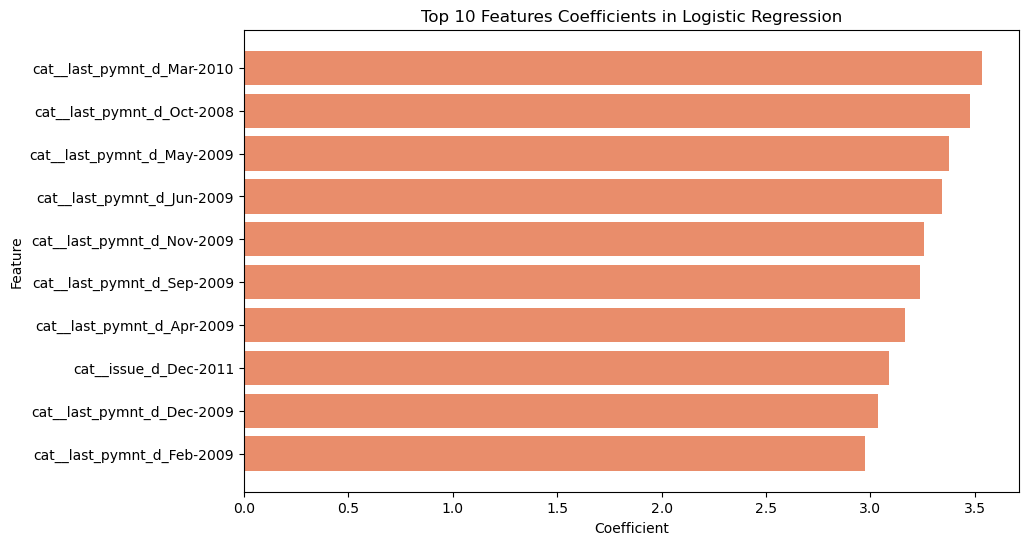

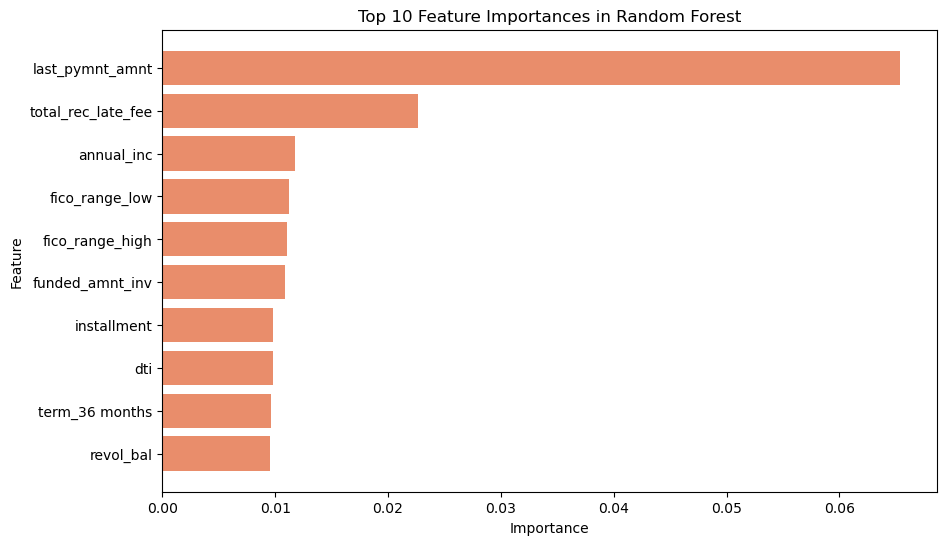

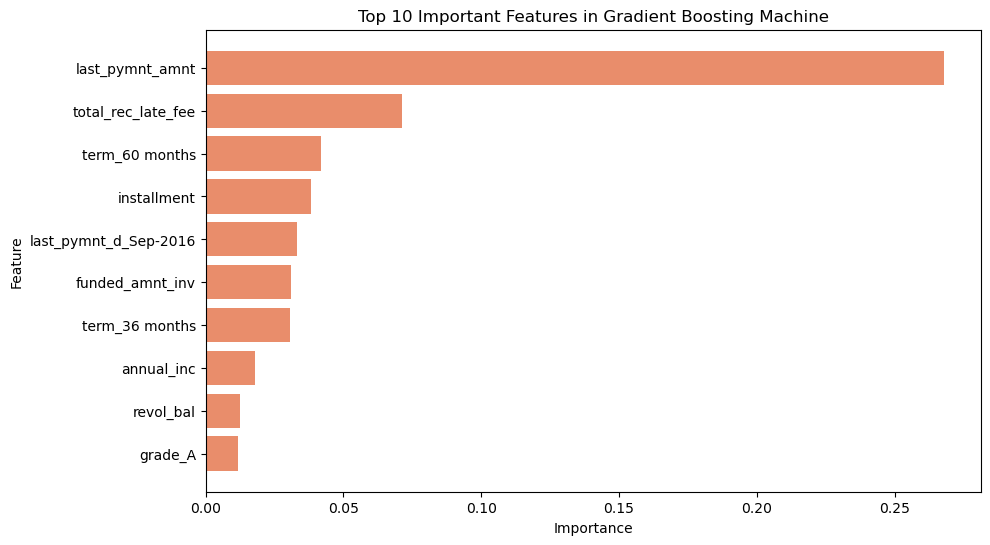

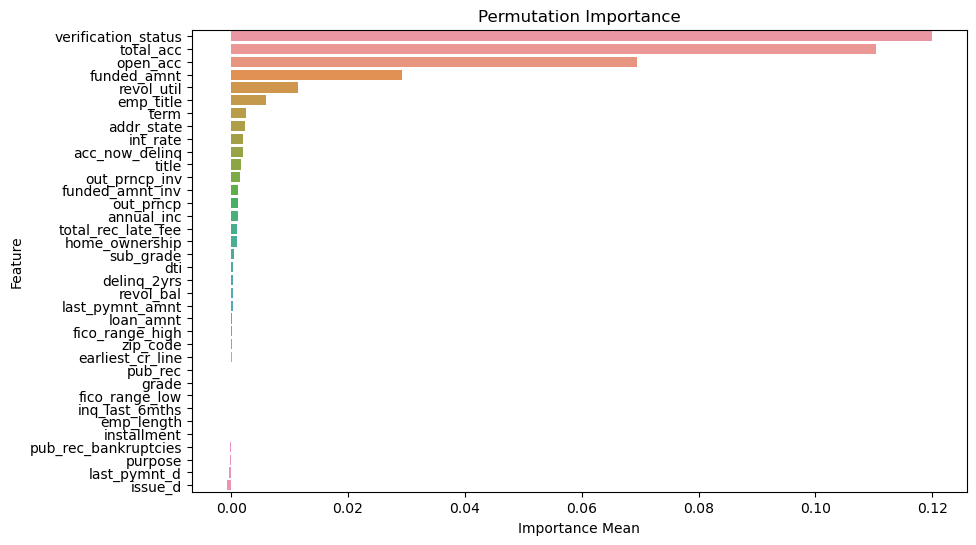

In [91]:
# Plot for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title('Top 10 Features Coefficients in Logistic Regression')
plt.barh(lr_feature_importance_df['Feature'][:10], lr_feature_importance_df['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Random Forest')
plt.barh(rf_feature_importance_df['Feature'][:10], rf_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for GBM HPO Features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features in Gradient Boosting Machine")
plt.barh(gbm_hpo_importance_df['Feature'][:10], gbm_hpo_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for stacking classifier importance
plt.figure(figsize=(10, 6))
plt.title("Most Important Features in Stacking Classifier")
sns.barplot(feature_importances_df, x='Importance Mean', y='Feature')
plt.title('Permutation Importance')
plt.show()

## Final Model: Optimized Stacking Classifier

### Partial Dependence Plots: Numerical

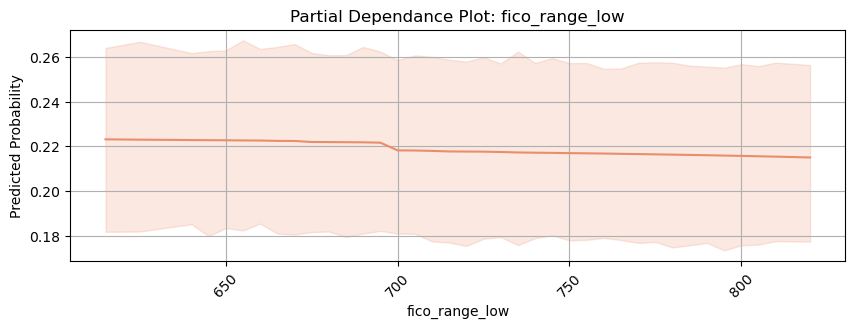

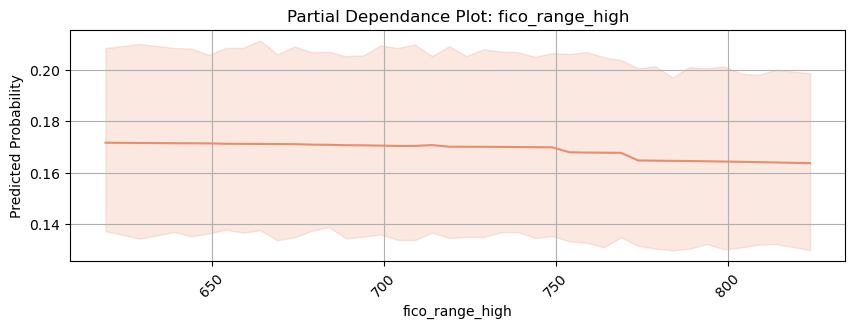

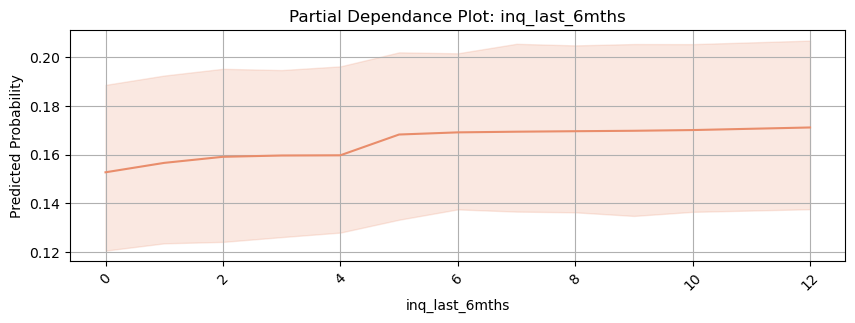

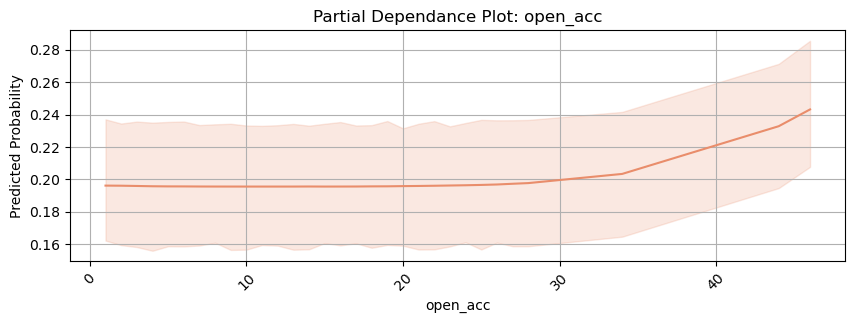

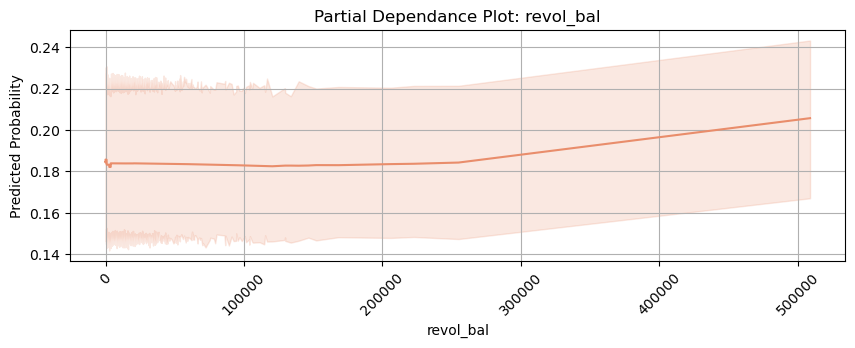

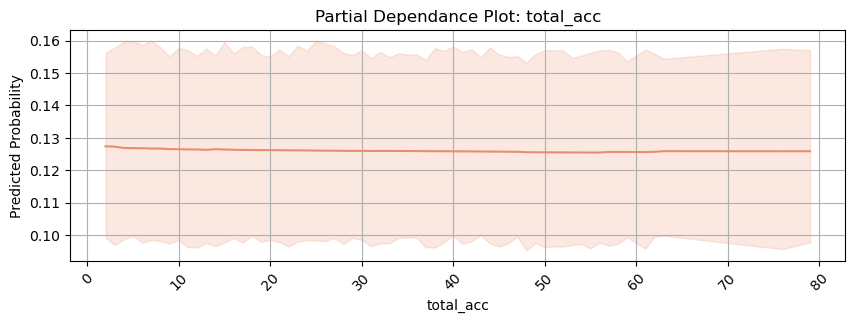

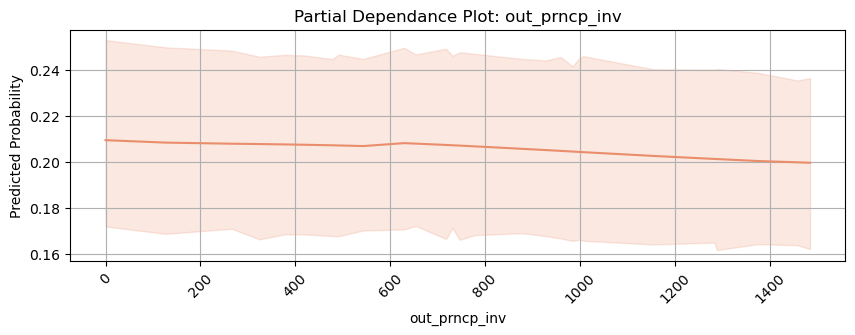

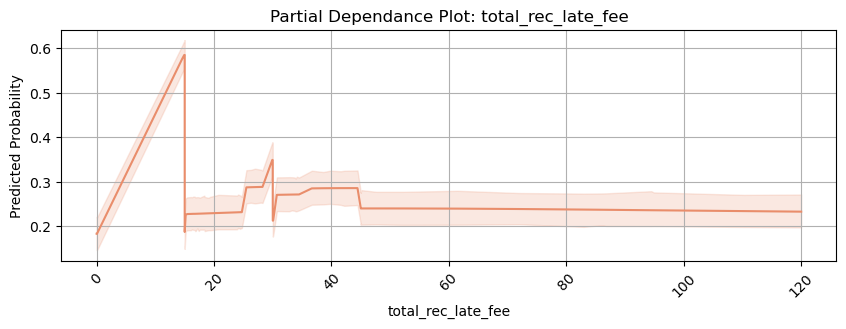

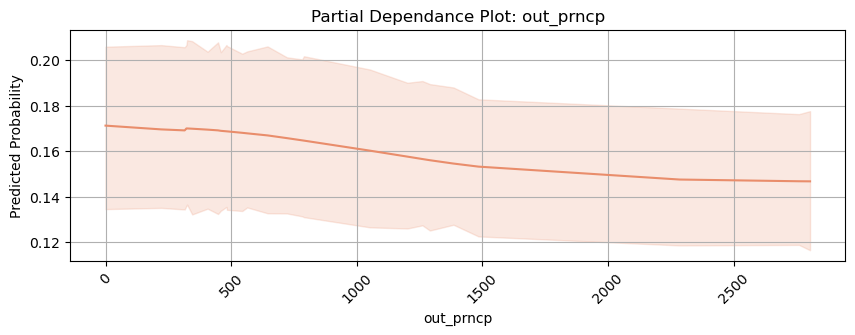

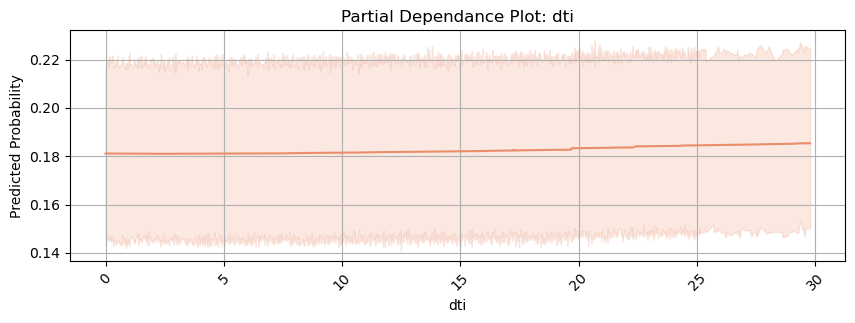

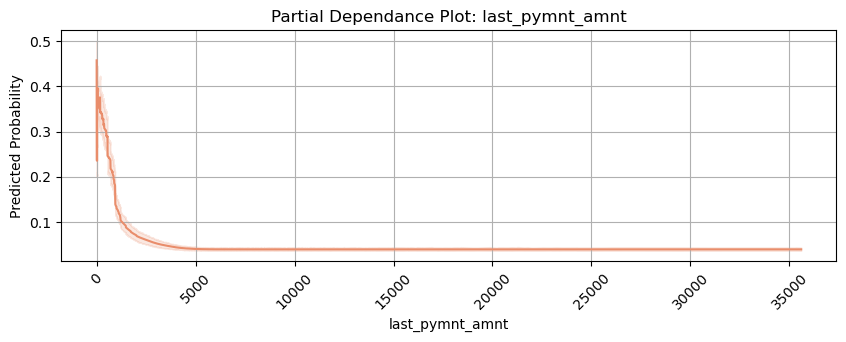

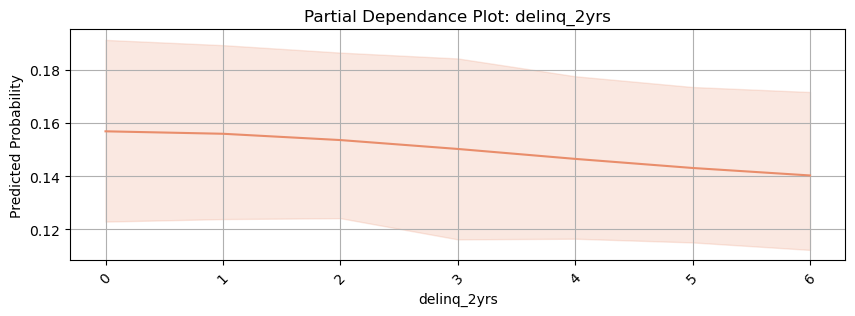

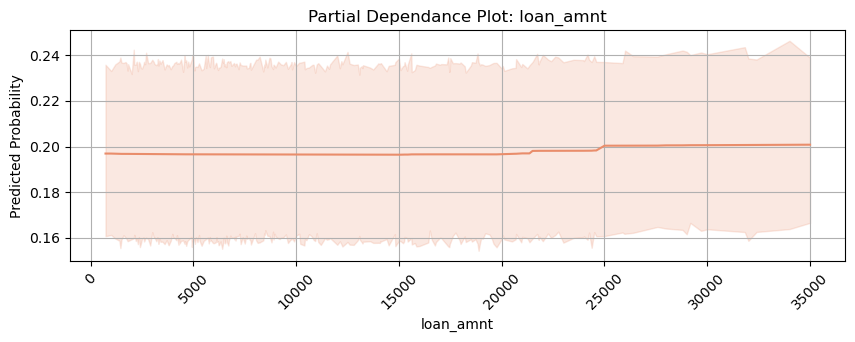

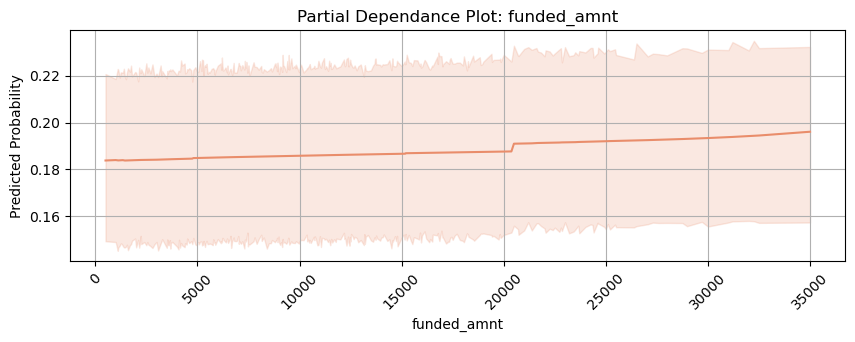

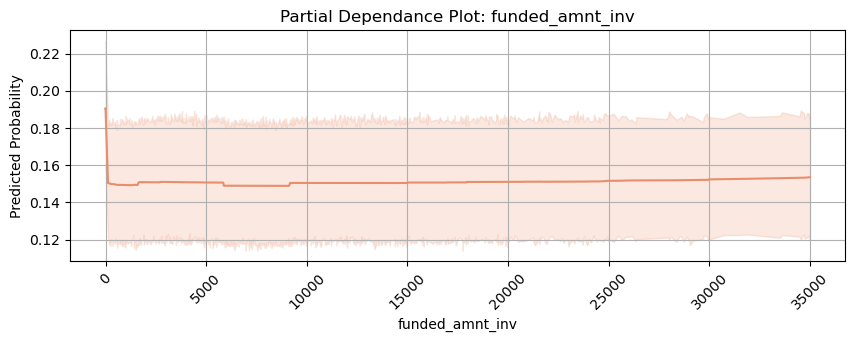

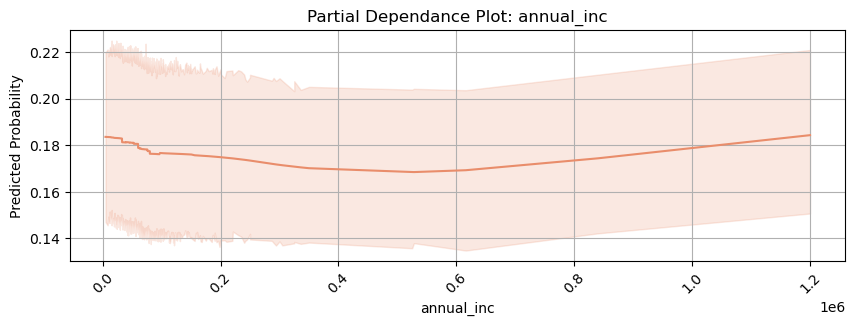

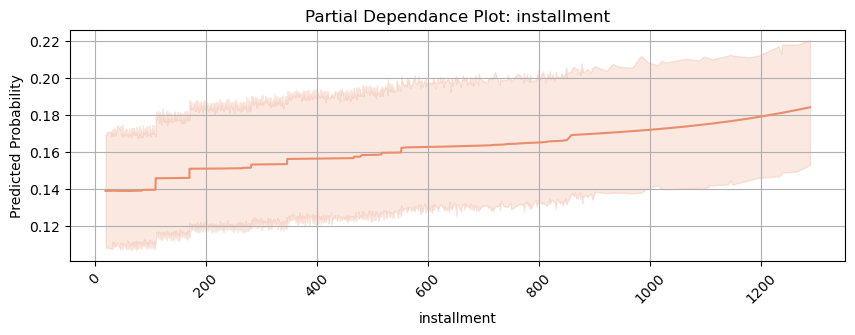

In [92]:
def pdp_plot_numeric(var, sample_n):
  # var = 'credit_amount'
  pdp_values = pd.DataFrame(X_train[var].sort_values().sample(frac=0.1).unique(),columns=[var])
  pdp_sample = X_train.sample(sample_n).drop(var, axis=1)

  pdp_cross = pdp_sample.merge(pdp_values, how='cross')
  pdp_cross['pred'] = stacking_pipeline.predict_proba(pdp_cross)[:,1]
  plt.figure(figsize=(10, 3))
  sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
  plt.title(f"Partial Dependance Plot: {var}")
  plt.ylabel('Predicted Probability')
  plt.xticks(rotation=45)
  #plt.ylim(0, 1)
  plt.grid(True)
  plt.show()

# numeric_features = ['credit_amount', 'duration', 'age']
for var in numeric_features:
  pdp_plot_numeric(var, sample_n=300)

### Partial Dependence Plots: Categorical

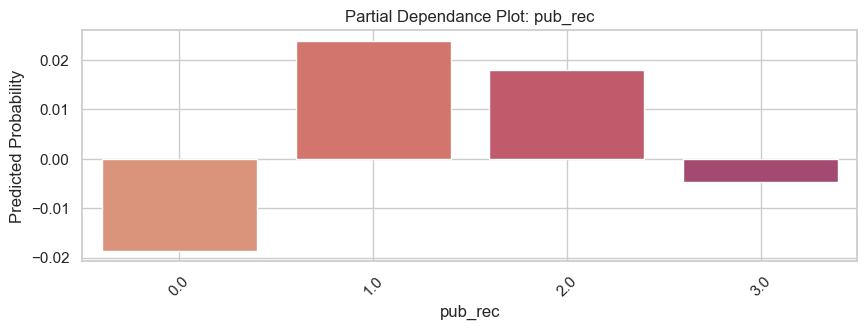

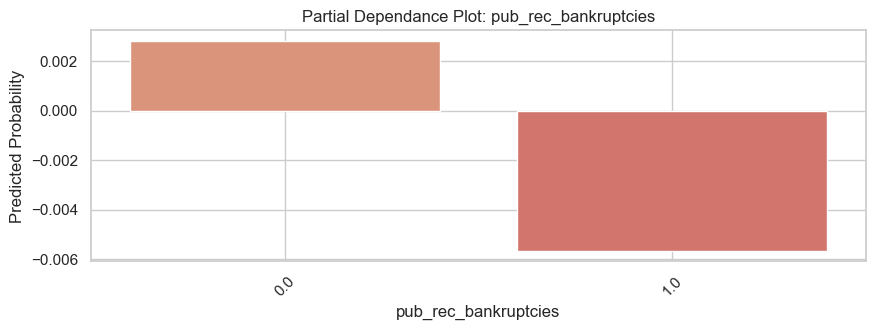

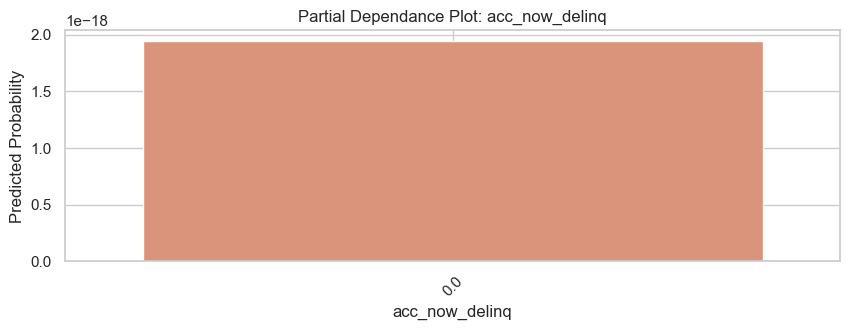

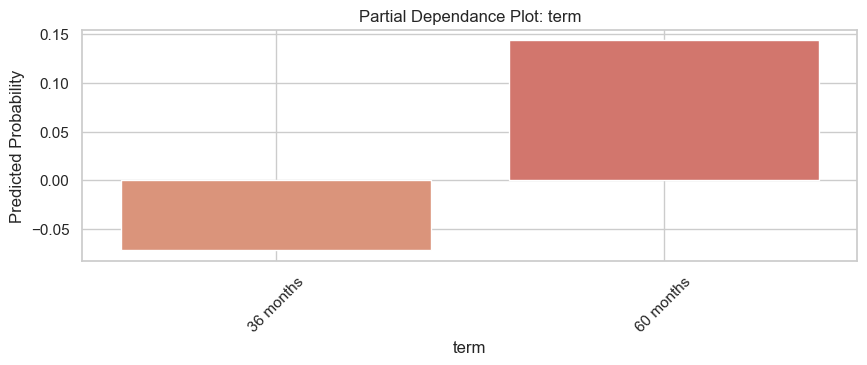

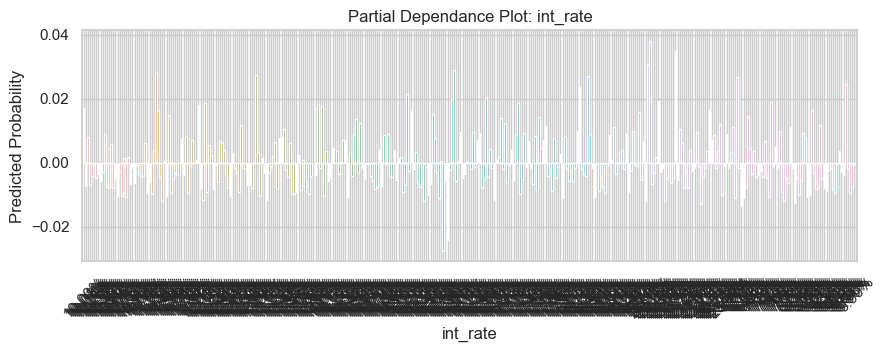

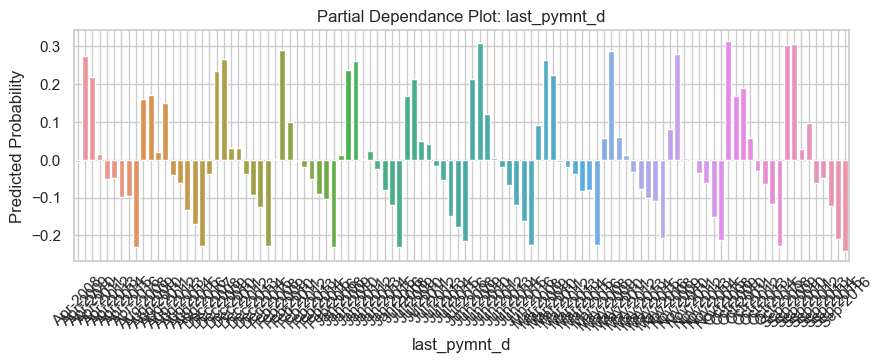

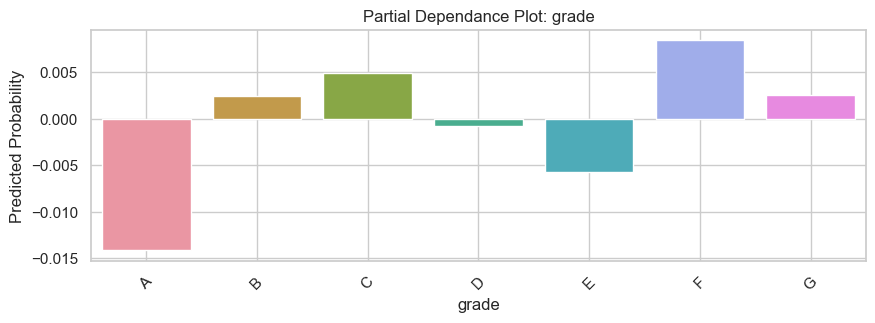

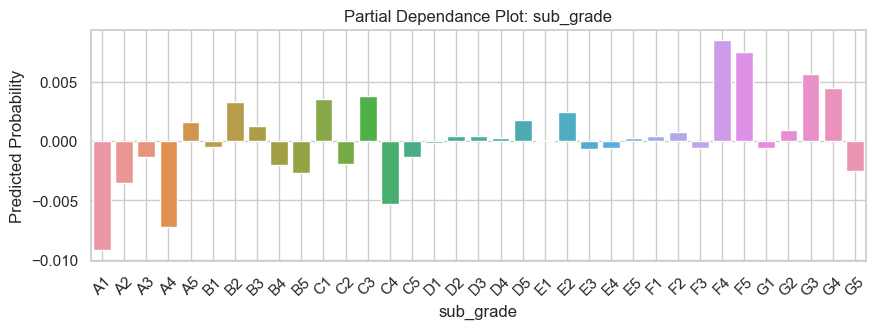

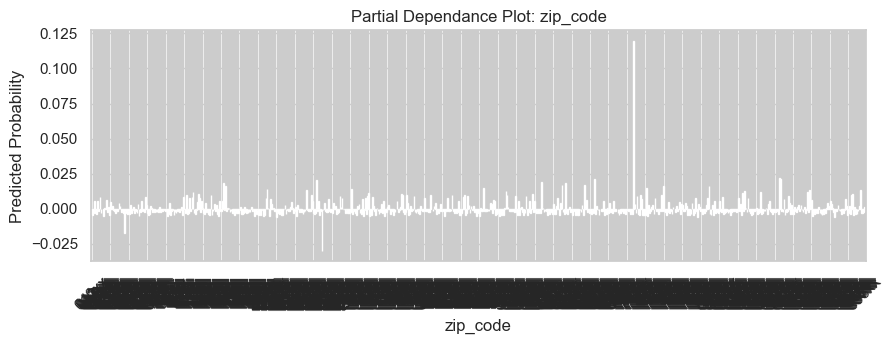

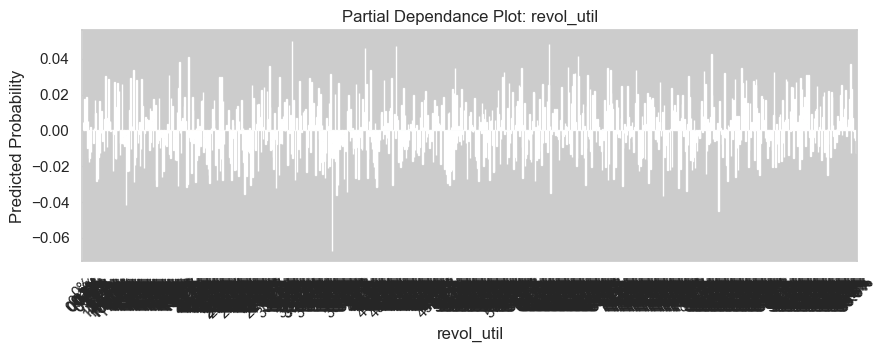

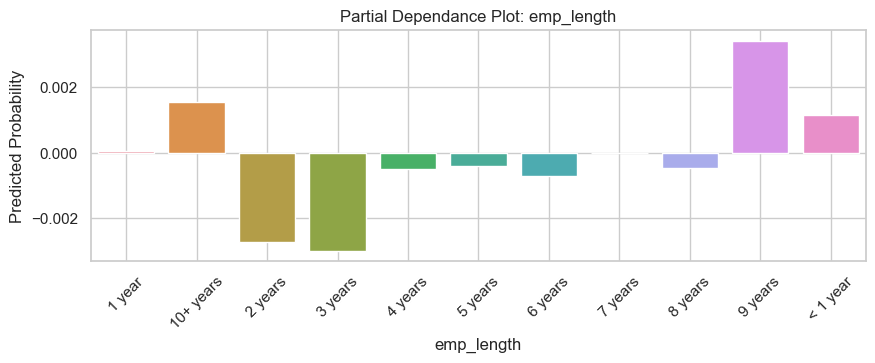

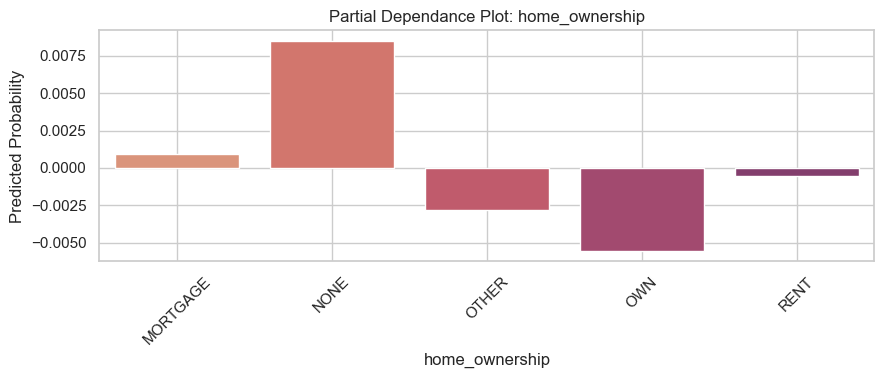

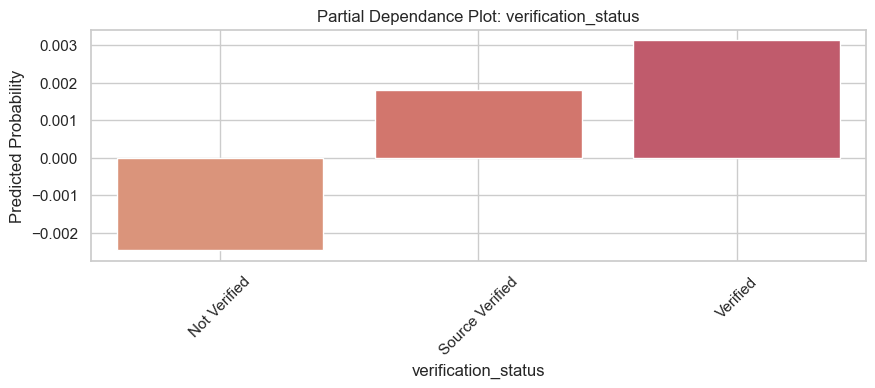

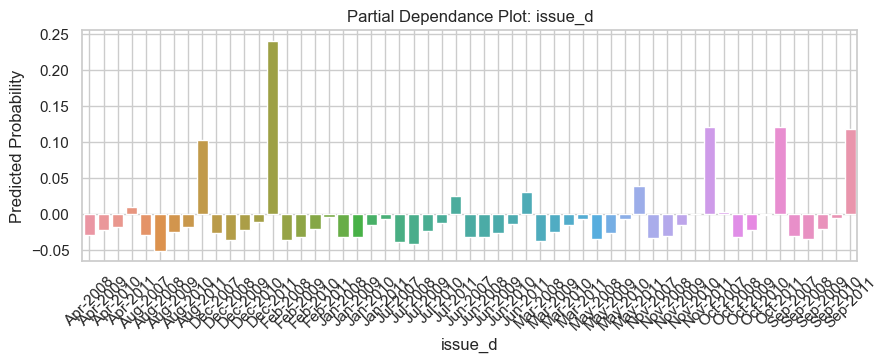

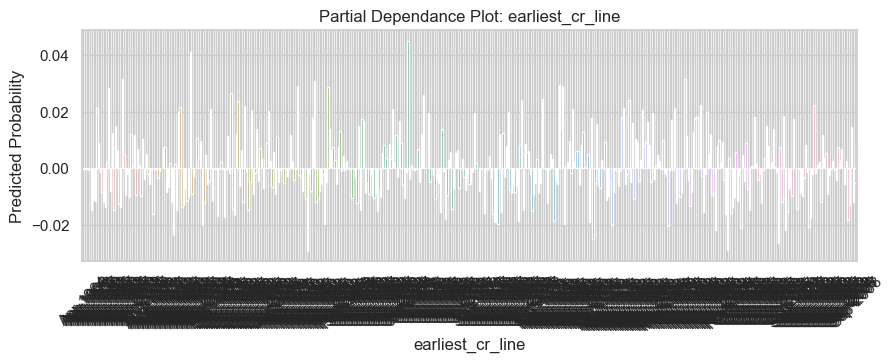

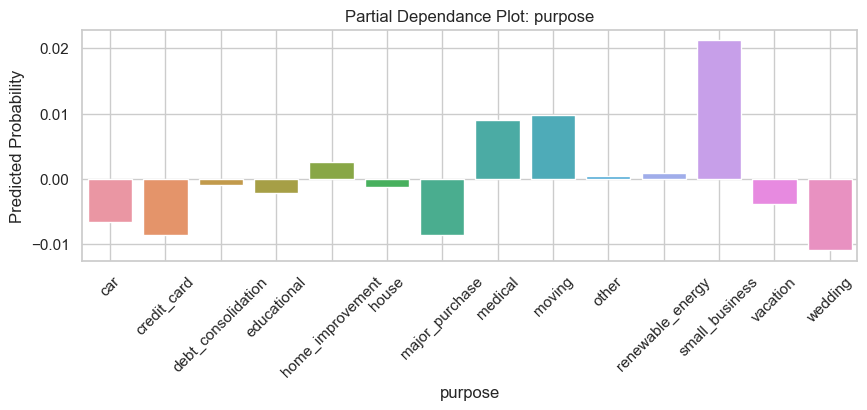

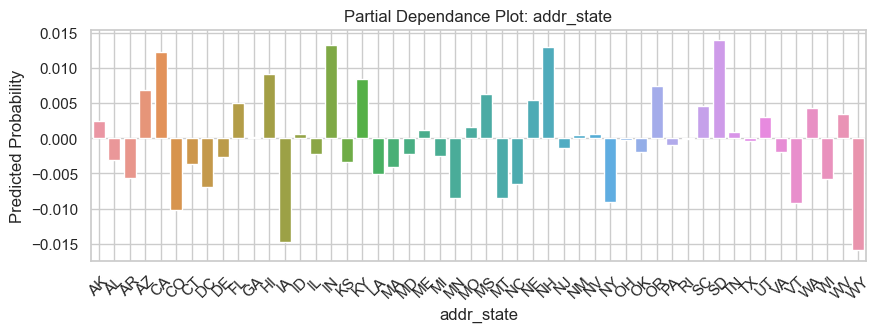

ValueError: 
$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 1000x300 with 1 Axes>

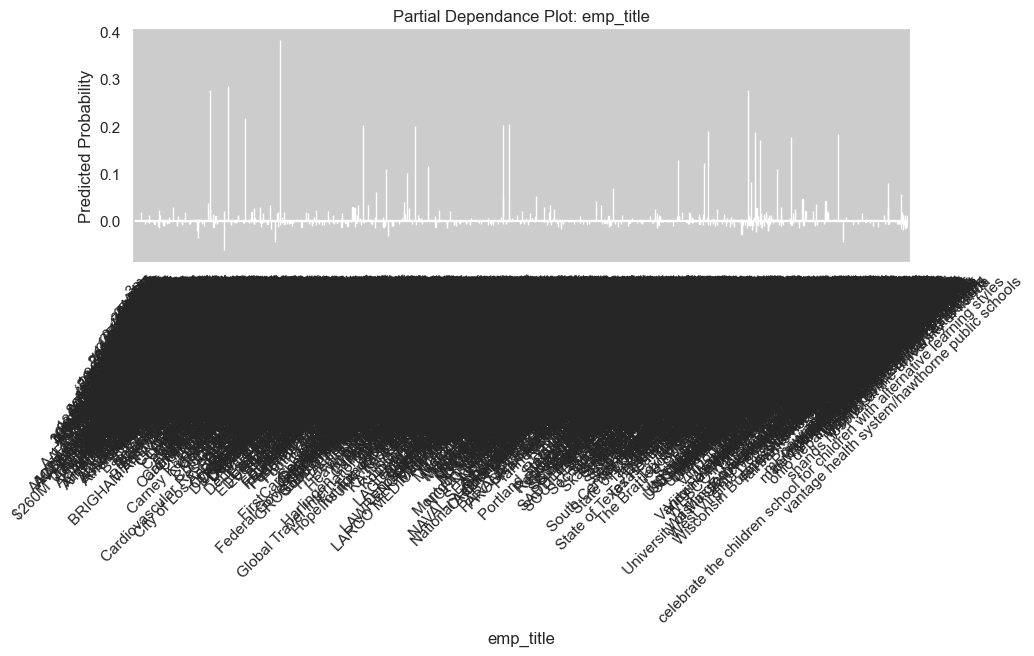

In [93]:
def pdp_plot_categorical(var, sample_n):
  sns.set_style("whitegrid")  # Try "darkgrid", "ticks", etc.
  sns.set_context("notebook")  # Try "paper", "notebook", "poster" for different sizes

  pdp_values = pd.DataFrame(X_test[var].sort_values().unique(),columns=[var])
  pdp_sample = X_test.sample(sample_n).drop(var, axis=1)

  pdp_cross = pdp_sample.merge(pdp_values, how='cross')
  pdp_cross['pred'] = stacking_pipeline.predict_proba(pdp_cross)[:,1]
  mean_pred = pdp_cross['pred'].mean()
  pdp_cross['pred'] = pdp_cross['pred'].apply(lambda x: x - mean_pred)
  plt.figure(figsize=(10, 3))
 #sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
  sns.barplot(x=f"{var}", y='pred',
              ci=None,
              data=pdp_cross,
              estimator="mean")
  plt.title(f"Partial Dependance Plot: {var}")
  plt.ylabel('Predicted Probability')
  plt.xticks(rotation=45)
  #plt.ylim(0, 1)
  plt.grid(True)
  plt.show()


for var in categorical_features:
  pdp_plot_categorical(var, sample_n=100)

### Dalex Explianer

In [94]:
import dalex as dx # for explanations
pipeline_explainer = dx.Explainer(stacking_pipeline, X_test, y_test)
pipeline_explainer

Preparation of a new explainer is initiated

  -> data              : 8934 rows 36 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8934 values
  -> model_class       : sklearn.ensemble._stacking.StackingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x15d3342c0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0279, mean = 0.149, max = 0.99
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.988, mean = 4.52e-05, max = 0.971
  -> model_info        : package sklearn

A new explainer has been created!


In [95]:
model_performance  = pipeline_explainer.model_performance("classification")
model_performance.result

recall  precision      f1  accuracy     auc
StackingClassifier 0.65691    0.86377 0.74627   0.93340 0.95542

### Variable Importance

In [96]:
# Calculate feature importance
fi = pipeline_explainer.model_parts(processes=4)

# Plot feature importance
fi.plot()

# PDP

In [97]:
# Let's say you want to create PDPs for a feature named 'feature_name'
pdp_numeric_profile = pipeline_explainer.model_profile(variables=numeric_features)

# Now, plot the PDP for 'feature_name'
pdp_numeric_profile.plot()

Calculating ceteris paribus: 100%|██████████| 17/17 [00:14<00:00,  1.14it/s]


In [98]:
pdp_categorical_profile = pipeline_explainer.model_profile(
    variable_type = 'categorical',
    variables=categorical_features)

# Now, plot the PDP for 'feature_name'
pdp_categorical_profile.plot()

Calculating ceteris paribus: 100%|██████████| 19/19 [02:22<00:00,  7.52s/it]


In [99]:
target = 'loan_status'

X_test['pred']= stacking_pipeline.predict(X_test)
X_test['pred_proba']= stacking_pipeline.predict_proba(X_test)[:,1]
X_test[target] = y_test
X_test.head()

pub_rec  pub_rec_bankruptcies  acc_now_delinq       term int_rate  \
28052  1.00000               1.00000         0.00000  36 months    7.88%   
4137   0.00000               0.00000         0.00000  60 months   13.49%   
18106  1.00000               1.00000         0.00000  36 months   15.95%   
6975   0.00000               0.00000         0.00000  36 months   10.99%   
21946  0.00000               0.00000         0.00000  36 months   13.48%   

      last_pymnt_d grade sub_grade zip_code revol_util  ... last_pymnt_amnt  \
28052     Sep-2013     A        A5    431xx       9.1%  ...       138.29000   
4137      Apr-2015     C        C1    786xx      60.3%  ...      7183.11000   
18106     Sep-2013     D        D4    984xx      78.9%  ...       254.71000   
6975      Dec-2012     B        B3    928xx      80.1%  ...     15729.78000   
21946     Apr-2013     C        C3    853xx        20%  ...        76.72000   

      delinq_2yrs   loan_amnt funded_amnt funded_amnt_inv  annual_inc  \
28052     0.00000  4200.00000  4200.00000      4100.00000 73500.00000   
4137      0.00000 18000.00000 18000.00000     17975.00000 60000.00000   
18106     0.00000  7000.00000  7000.00000      7000.00000 61392.00000   
6975      0.00000 25000.00000 25000.00000     25000.00000 57120.00000   
21946     0.00000  2000.00000  2000.00000      1975.00000 20928.00000   

      installment pred pred_proba  loan_status  
28052   131.39000    0    0.04662            0  
4137    414.09000    0    0.03882            0  
18106   245.93000    0    0.28666            0  
6975    818.35000    0    0.03612            0  
21946    67.85000    0    0.06988            0  

[5 rows x 39 columns]

### Top 10 True Positives:

In [101]:
top_10_tp = (X_test
             .query('loan_status == pred and loan_status == 1')
             .sort_values(by='pred_proba', ascending=False)
             .head(10)
             .reset_index(drop=True)
)
top_10_tp

pub_rec  pub_rec_bankruptcies  acc_now_delinq       term int_rate  \
0  0.00000               0.00000         0.00000  60 months   21.67%   
1  0.00000               0.00000         0.00000  60 months   19.03%   
2  0.00000               0.00000         0.00000  36 months   17.03%   
3  0.00000               0.00000         0.00000  60 months   14.83%   
4  0.00000               0.00000         0.00000  60 months   17.19%   
5  0.00000               0.00000         0.00000  60 months   17.27%   
6  0.00000               0.00000         0.00000  60 months   19.91%   
7  1.00000               1.00000         0.00000  60 months   19.74%   
8  0.00000               0.00000         0.00000  36 months   15.21%   
9  0.00000               0.00000         0.00000  60 months   14.83%   

  last_pymnt_d grade sub_grade zip_code revol_util  ... last_pymnt_amnt  \
0     Dec-2012     F        F3    117xx      97.1%  ...       412.98000   
1     Nov-2012     E        E2    967xx      45.8%  ...       209.43000   
2     Apr-2009     F        F5    900xx      90.5%  ...       127.03000   
3     Sep-2011     D        D3    922xx      79.2%  ...        65.84000   
4     Oct-2011     E        E3    921xx      33.9%  ...       160.95000   
5     Feb-2012     D        D3    191xx      41.9%  ...       329.98000   
6     Apr-2015     E        E4    997xx        72%  ...       694.15000   
7     Jul-2012     F        F5    554xx      74.6%  ...       476.80000   
8     Aug-2011     D        D2    400xx      12.4%  ...       150.00000   
9     May-2011     D        D3    803xx      41.5%  ...       350.00000   

  delinq_2yrs   loan_amnt funded_amnt funded_amnt_inv   annual_inc  \
0     0.00000 15000.00000 15000.00000     14975.00000  33000.00000   
1     0.00000  8000.00000  8000.00000      8000.00000 108000.00000   
2     0.00000  3500.00000  3500.00000         0.00000  70000.00000   
3     1.00000  2100.00000  2100.00000      2050.00000  45000.00000   
4     0.00000 12000.00000 12000.00000     10700.00000  60000.00000   
5     0.00000 12000.00000 12000.00000     12000.00000  70000.00000   
6     0.00000 25000.00000 25000.00000     24975.00000  49960.00000   
7     0.00000 16000.00000 16000.00000     15975.00000  60000.00000   
8     2.00000  6000.00000  6000.00000      6000.00000  25000.00000   
9     0.00000 25000.00000 25000.00000     23950.00000 109000.00000   

  installment pred pred_proba  loan_status  
0   411.48000    1    0.98995            1  
1   207.66000    1    0.98992            1  
2   124.84000    1    0.98976            1  
3    49.78000    1    0.98965            1  
4   299.46000    1    0.98964            1  
5   299.98000    1    0.98957            1  
6   661.10000    1    0.98926            1  
7   421.60000    1    0.98920            1  
8   208.61000    1    0.98913            1  
9   592.52000    1    0.98913            1  

[10 rows x 39 columns]

In [102]:
bd_1 = pipeline_explainer.predict_parts(top_10_tp.iloc[0],
                                           type='break_down',
                                           label="record 1")

In [103]:
bd_1.result

variable_name           variable_value  \
0              intercept                            
1     total_rec_late_fee                    14.95   
2                   term                60 months   
3                issue_d                 Dec-2011   
4        last_pymnt_amnt                    413.0   
5           last_pymnt_d                 Dec-2012   
6            installment                    411.5   
7                  grade                        F   
8         fico_range_low                    660.0   
9        fico_range_high                    664.0   
10            annual_inc                  33000.0   
11           funded_amnt                  15000.0   
12              zip_code                    117xx   
13       funded_amnt_inv                  14980.0   
14           delinq_2yrs                      0.0   
15   verification_status          Source Verified   
16  pub_rec_bankruptcies                      0.0   
17               purpose       debt_consolidation   
18            pred_proba                   0.9899   
19        acc_now_delinq                      0.0   
20           loan_status                      1.0   
21                  pred                      1.0   
22         out_prncp_inv                      0.0   
23             out_prncp                      0.0   
24             sub_grade                       F3   
25             revol_bal                  12960.0   
26             total_acc                     20.0   
27                   dti                    14.36   
28            revol_util                    97.1%   
29             loan_amnt                  15000.0   
30              open_acc                      9.0   
31      earliest_cr_line                 Oct-1998   
32               pub_rec                      0.0   
33             emp_title               U Store It   
34        inq_last_6mths                      1.0   
35            emp_length                  2 years   
36                 title  Debt Consolidation Loan   
37            addr_state                       NY   
38        home_ownership                      OWN   
39              int_rate                   21.67%   
40                                                  

                                 variable  cumulative  contribution     sign  \
0                               intercept     0.14905       0.14905  1.00000   
1              total_rec_late_fee = 14.95     0.59051       0.44146  1.00000   
2                        term = 60 months     0.66661       0.07610  1.00000   
3                      issue_d = Dec-2011     0.71208       0.04547  1.00000   
4                 last_pymnt_amnt = 413.0     0.95475       0.24267  1.00000   
5                 last_pymnt_d = Dec-2012     0.98624       0.03149  1.00000   
6                     installment = 411.5     0.98715       0.00091  1.00000   
7                               grade = F     0.98815       0.00100  1.00000   
8                  fico_range_low = 660.0     0.98858       0.00042  1.00000   
9                 fico_range_high = 664.0     0.98893       0.00036  1.00000   
10                   annual_inc = 33000.0     0.98914       0.00021  1.00000   
11                  funded_amnt = 15000.0     0.98921       0.00007  1.00000   
12                       zip_code = 117xx     0.98922       0.00001  1.00000   
13              funded_amnt_inv = 14980.0     0.98927       0.00005  1.00000   
14                      delinq_2yrs = 0.0     0.98928       0.00001  1.00000   
15  verification_status = Source Verified     0.98938       0.00011  1.00000   
16             pub_rec_bankruptcies = 0.0     0.98936      -0.00003 -1.00000   
17           purpose = debt_consolidation     0.98940       0.00005  1.00000   
18                    pred_proba = 0.9899     0.98940       0.00000  0.00000   
19                   acc_now_delinq = 0.0     0.98940       0.00000  0.00000   
20                      loan_status = 1.0     0.98940       0.00000  0.00000   
21                      

In [104]:
bd_1.plot()

#### Breakdowns:

In [105]:
for index, row in top_10_tp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_tp.iloc[index],
      type='break_down',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()

### Top 10 False Positives:

In [111]:
top_10_fp = (X_test
             .query('loan_status != pred and loan_status == 0')
             .sort_values(by='pred_proba', ascending=False)
             .head(10)
             .reset_index(drop=True)
)
top_10_fp 

pub_rec  pub_rec_bankruptcies  acc_now_delinq       term int_rate  \
0  0.00000               0.00000         0.00000  60 months   18.99%   
1  0.00000               0.00000         0.00000  36 months   10.39%   
2  0.00000               0.00000         0.00000  60 months   19.42%   
3  0.00000               0.00000         0.00000  60 months   12.68%   
4  1.00000               1.00000         0.00000  36 months   18.29%   
5  1.00000               1.00000         0.00000  60 months   14.27%   
6  0.00000               0.00000         0.00000  60 months   15.95%   
7  0.00000               0.00000         0.00000  60 months   11.86%   
8  0.00000               0.00000         0.00000  60 months   17.99%   
9  0.00000               0.00000         0.00000  60 months   19.69%   

  last_pymnt_d grade sub_grade zip_code revol_util  ... last_pymnt_amnt  \
0     Aug-2011     F        F3    211xx      72.5%  ...       429.16000   
1     Dec-2009     B        B4    910xx      28.9%  ...        28.00000   
2     Feb-2014     E        E3    760xx      28.9%  ...       447.55000   
3     Aug-2011     C        C1    272xx      68.4%  ...       411.26000   
4     Dec-2009     G        G4    105xx      44.6%  ...        23.01000   
5     Jan-2014     C        C2    923xx      44.7%  ...       218.35000   
6     Jan-2012     D        D4    481xx        65%  ...        43.89000   
7     Dec-2011     B        B5    481xx      50.2%  ...       244.31000   
8     Jan-2013     E        E1    023xx      48.1%  ...       754.98000   
9     Nov-2013     E        E5    916xx      58.7%  ...       208.28000   

  delinq_2yrs   loan_amnt funded_amnt funded_amnt_inv   annual_inc  \
0     0.00000 22300.00000 22300.00000     15971.73901  84000.00000   
1     0.00000 10000.00000 10000.00000      8850.00000  38400.00000   
2     0.00000 18875.00000 18875.00000     18850.00000  53700.00000   
3     0.00000 25000.00000 25000.00000     24925.00000  96000.00000   
4     1.00000 17350.00000 11350.00000      8450.00000  95000.00000   
5     0.00000  4200.00000  4200.00000      4200.00000  40000.00000   
6     0.00000 18000.00000 14525.00000     14289.98054  45000.00000   
7     0.00000 19750.00000 13175.00000     13000.00000  57000.00000   
8     0.00000 35000.00000 35000.00000     15065.95649 195200.00000   
9     0.00000 29600.00000 29600.00000     29475.00000 110000.00000   

  installment pred pred_proba  loan_status  
0   578.36000    1    0.98755            0  
1   324.51000    1    0.98693            0  
2   494.01000    1    0.98622            0  
3   564.74000    1    0.98564            0  
4   411.99000    1    0.98370            0  
5    98.32000    1    0.98293            0  
6   352.84000    1    0.98271            0  
7   292.14000    1    0.98193            0  
8   888.58000    1    0.98173            0  
9   779.13000    1    0.97908            0  

[10 rows x 39 columns]

#### Breakdown

In [113]:
for index, row in top_10_fp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fp.iloc[index],
      type='shap',
      B=5,
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()

### Top 10 False Negatives:

In [109]:
top_10_fn = (X_test
             .query('loan_status != pred and loan_status == 1')
             .sort_values(by='pred_proba', ascending=True)
             .head(10)
             .reset_index(drop=True)
)
top_10_fn

pub_rec  pub_rec_bankruptcies  acc_now_delinq       term int_rate  \
0  0.00000               0.00000         0.00000  36 months    5.79%   
1  0.00000               0.00000         0.00000  36 months    5.79%   
2  0.00000               0.00000         0.00000  36 months   10.65%   
3  0.00000               0.00000         0.00000  60 months    9.62%   
4  0.00000               0.00000         0.00000  36 months    7.68%   
5  0.00000               0.00000         0.00000  36 months    5.79%   
6  0.00000               0.00000         0.00000  36 months    7.49%   
7  0.00000               0.00000         0.00000  36 months    7.51%   
8  0.00000               0.00000         0.00000  36 months    8.59%   
9  0.00000               0.00000         0.00000  36 months    7.14%   

  last_pymnt_d grade sub_grade zip_code revol_util  ... last_pymnt_amnt  \
0     Nov-2012     A        A2    605xx        15%  ...      1328.00000   
1     Mar-2012     A        A2    811xx      57.5%  ...      2300.00000   
2     Dec-2014     B        B2    210xx      53.4%  ...      1542.02000   
3     Nov-2013     B        B3    112xx       9.7%  ...      4841.69000   
4     Mar-2011     A        A2    219xx      32.9%  ...       218.34000   
5     Jun-2013     A        A2    333xx      18.4%  ...        75.82000   
6     Mar-2013     A        A4    751xx       2.4%  ...       389.08000   
7     Jan-2013     A        A4    349xx      20.3%  ...       186.67000   
8     Sep-2012     A        A4    140xx      23.9%  ...       158.06000   
9     Oct-2012     A        A3    945xx      41.8%  ...       309.42000   

  delinq_2yrs   loan_amnt funded_amnt funded_amnt_inv   annual_inc  \
0     0.00000  6500.00000  6500.00000      6496.81603  66000.00000   
1     0.00000  7000.00000  7000.00000      7000.00000  46932.00000   
2     0.00000 35000.00000 35000.00000     35000.00000 225000.00000   
3     1.00000 20000.00000 20000.00000     17991.54497  96000.00000   
4     0.00000  7000.00000  7000.00000      7000.00000  84700.00000   
5     0.00000  2500.00000  2500.00000      2500.00000  40000.00000   
6     0.00000  6350.00000  6350.00000      6100.00000  43200.00000   
7     0.00000  6000.00000  6000.00000      6000.00000  93000.00000   
8     0.00000  5000.00000  5000.00000      4850.00000  75000.00000   
9     0.00000 10000.00000 10000.00000      9450.00000 135000.00000   

  installment pred pred_proba  loan_status  
0   197.13000    0    0.02882            1  
1   212.29000    0    0.03164            1  
2  1140.07000    0    0.03446            1  
3   421.22000    0    0.03497            1  
4   218.34000    0    0.03541            1  
5    75.82000    0    0.03563            1  
6   197.50000    0    0.03578            1  
7   186.67000    0    0.03709            1  
8   158.06000    0    0.03709            1  
9   309.42000    0    0.03721            1  

[10 rows x 39 columns]

#### Breakdown

In [110]:
for index, row in top_10_fn.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fn.iloc[index],
      type='shap',
      B=5,
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()